## **Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.**

#### Approach 1

In [1]:
#Import Libraries
import pandas as pd

In [2]:
# # Import data from local system
# file_path = r'C:\NumpyNinja\ML classes -Project\ML Assignments\adult\adult.data'

# df = pd.read_csv(file_path, delimiter=",", names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])

# df

#### **The number of rows here are 32561 and it is not matching with the number of instances given in dataset link. We decided to move forward with approach 2**

#### Approach 2

In [159]:
#Installing ucimlrepo package
!pip install ucimlrepo

In [160]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

from ucimlrepo import fetch_ucirepo, list_available_datasets


from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics


def printmd(string):
    display(Markdown(string))
    
    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder

In [161]:
#List of UCI repositories with ID
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [162]:
# Fetch the 'adult' dataset from UCI repository where id for dataset is 2
adultDataset = fetch_ucirepo(id=2)

In [163]:
#Creating dataframe by joining features and target
Xdata = pd.DataFrame(adultDataset.data.features)
Ydata = pd.DataFrame(adultDataset.data.targets, columns=['income'])
adultDataFrame = pd.concat([Xdata,Ydata], axis = 1)
adultDataFrame

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [164]:
# Displaying first 10 rows of dataset
adultDataFrame.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [165]:
# Displaying 5 rows using sample function
adultDataFrame.sample(n=5,random_state = 42)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,<=50K
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,<=50K
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,<=50K


In [166]:
# Examining columns using info
adultDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [167]:
# Checking for missing values using isnull
adultDataFrame.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [168]:
# Summary statistics for numerical columns using describe 
adultDataFrame.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [169]:
# For checking summary statistics for categorical columns
adultDataFrame.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


**Data Cleaning:
Handle missing values by either removing rows or filling them with appropriate values (mean, median, mode, etc.). Correct data types if needed. Address any outliers or anomalies**

In [170]:
#checking for null values in the columns
adultDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [171]:
adultDataFrame.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [172]:
(adultDataFrame == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [173]:
adult_df_cleaned = adultDataFrame.replace('?', np.nan)
adult_df_cleaned.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [174]:
row_withnullval = adult_df_cleaned[adult_df_cleaned['workclass'].isnull()]
row_withnullval.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
149,43,NaN,174662,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,NaN,252903,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,NaN,38317,1st-4th,2,Divorced,NaN,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,NaN,135105,Bachelors,13,Divorced,NaN,Not-in-family,White,Female,0,0,50,United-States,<=50K


In [175]:
adult_df_cleaned['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [176]:
adult_df_cleaned['income'].replace('<=50K.', '<=50K',inplace = True)
adult_df_cleaned['income'].replace('>50K.', '>50K',inplace = True)
adult_df_cleaned['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [177]:
#filling the missing values for workclass column

#identify missing values in workclass column
test_data = adult_df_cleaned[(adult_df_cleaned['workclass'].isnull())].copy()
test_label = test_data.workclass

train_data = adult_df_cleaned[(adult_df_cleaned['workclass'].notnull())].copy()
train_label = train_data.workclass

#remove the workclass column from train data and test data
test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
train_encoded = encoder.fit_transform(train_data)

# Apply the same encoding to the test data
test_encoded = encoder.transform(test_data)

# Ensure both datasets have the same columns
train_data_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_data_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())


# Perform one-hot encoding on train_data and test_data
train_data_encoded = pd.get_dummies(train_data)
test_data_encoded = pd.get_dummies(test_data)

# Ensure test_data_encoded has the same columns as train_data_encoded
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

#Train and predict the model using logistic regression
log_reg = LogisticRegression()
log_reg.fit(train_data_encoded, train_label)
log_reg_pred = log_reg.predict(test_data_encoded)

#Train and predict the model using decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data_encoded, train_label)
clf_pred = clf.predict(test_data_encoded)

#Train and predict the model using random forest classifier
r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data_encoded, train_label)
r_forest_pred = r_forest.predict(test_data_encoded)

# Determine the majority class for 'workclass'
majority_class = adult_df_cleaned.workclass.value_counts().index[0]

# Create DataFrame for predictions from different models
pred_df = pd.DataFrame({'RFor': r_forest_pred, 'DTree': clf_pred, 'LogReg': log_reg_pred})
#pred_df

#Determine the overall prediction using majority voting
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis=1)
#overall_pred

# Ensure the 'overall_pred' has the same index as the rows we want to update
mask = adult_df_cleaned['workclass'].isnull()
adult_df_cleaned.loc[mask, 'workclass'] = overall_pred.values

# Verify the results
print(adult_df_cleaned.workclass.value_counts())
print(adult_df_cleaned.workclass.unique())

workclass
Private             36659
Self-emp-not-inc     3878
Local-gov            3153
State-gov            1981
Self-emp-inc         1696
Federal-gov          1436
Without-pay            21
Never-worked           18
Name: count, dtype: int64
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Never-worked' 'Without-pay']


In [178]:
#filling the missing values for occupation column

#identify missing values in occupation column
test_data = adult_df_cleaned[(adult_df_cleaned['occupation'].isnull())].copy()
test_label = test_data.occupation

train_data = adult_df_cleaned[(adult_df_cleaned['occupation'].notnull())].copy()
train_label = train_data.occupation

#remove the occupation column from train data and test data
test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
train_encoded = encoder.fit_transform(train_data)

# Apply the same encoding to the test data
test_encoded = encoder.transform(test_data)

# Ensure both datasets have the same columns
train_data_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_data_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())


# Perform one-hot encoding on train_data and test_data
train_data_encoded = pd.get_dummies(train_data)
test_data_encoded = pd.get_dummies(test_data)

# Ensure test_data_encoded has the same columns as train_data_encoded
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

#Train and predict the model using logistic regression
log_reg = LogisticRegression()
log_reg.fit(train_data_encoded, train_label)
log_reg_pred = log_reg.predict(test_data_encoded)

#Train and predict the model using decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data_encoded, train_label)
clf_pred = clf.predict(test_data_encoded)

#Train and predict the model using random forest classifier
r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data_encoded, train_label)
r_forest_pred = r_forest.predict(test_data_encoded)

# Determine the majority class for 'occupation'
majority_class = adult_df_cleaned.occupation.value_counts().index[0]

# Create DataFrame for predictions from different models
pred_df = pd.DataFrame({'RFor': r_forest_pred, 'DTree': clf_pred, 'LogReg': log_reg_pred})
#pred_df

#Determine the overall prediction using majority voting
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis=1)
#overall_pred

# Ensure the 'overall_pred' has the same index as the rows we want to update
mask = adult_df_cleaned['occupation'].isnull()
adult_df_cleaned.loc[mask, 'occupation'] = overall_pred.values

# Verify the results
print(adult_df_cleaned.occupation.value_counts())
print(adult_df_cleaned.occupation.unique())

occupation
Prof-specialty       7648
Craft-repair         6519
Exec-managerial      6151
Adm-clerical         5783
Sales                5676
Other-service        5217
Machine-op-inspct    3085
Transport-moving     2401
Handlers-cleaners    2132
Farming-fishing      1508
Tech-support         1465
Protective-serv       987
Priv-house-serv       255
Armed-Forces           15
Name: count, dtype: int64
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [179]:
#filling the missing values for native-country column

#identify missing values in native-country column
test_data = adult_df_cleaned[(adult_df_cleaned['native-country'].isnull())].copy()
test_label = test_data['native-country']

train_data = adult_df_cleaned[(adult_df_cleaned['native-country'].notnull())].copy()
train_label = train_data['native-country']

#remove the native-country column from train data and test data
test_data.drop(columns = ['native-country'], inplace = True)
train_data.drop(columns = ['native-country'], inplace = True)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
train_encoded = encoder.fit_transform(train_data)

# Apply the same encoding to the test data
test_encoded = encoder.transform(test_data)

# Ensure both datasets have the same columns
train_data_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_data_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())


# Perform one-hot encoding on train_data and test_data
train_data_encoded = pd.get_dummies(train_data)
test_data_encoded = pd.get_dummies(test_data)

# Ensure test_data_encoded has the same columns as train_data_encoded
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

#Train and predict the model using logistic regression
log_reg = LogisticRegression()
log_reg.fit(train_data_encoded, train_label)
log_reg_pred = log_reg.predict(test_data_encoded)

#Train and predict the model using decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data_encoded, train_label)
clf_pred = clf.predict(test_data_encoded)

#Train and predict the model using random forest classifier
r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data_encoded, train_label)
r_forest_pred = r_forest.predict(test_data_encoded)

# Determine the majority class for 'occupation'
majority_class = adult_df_cleaned['native-country'].value_counts().index[0]

# Create DataFrame for predictions from different models
pred_df = pd.DataFrame({'RFor': r_forest_pred, 'DTree': clf_pred, 'LogReg': log_reg_pred})
#pred_df

#Determine the overall prediction using majority voting
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis=1)
#overall_pred

# Ensure the 'overall_pred' has the same index as the rows we want to update
mask = adult_df_cleaned['native-country'].isnull()
adult_df_cleaned.loc[mask, 'native-country'] = overall_pred.values

# Verify the results
print(adult_df_cleaned['native-country'].value_counts())
print(adult_df_cleaned['native-country'].unique())

native-country
United-States                 44648
Mexico                          959
Philippines                     302
Germany                         206
Puerto-Rico                     185
Canada                          182
India                           155
El-Salvador                     155
Cuba                            139
England                         127
China                           126
South                           121
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            95
Guatemala                        89
Poland                           87
Vietnam                          87
Columbia                         85
Haiti                            75
Portugal                         68
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [180]:
adultDataFrame['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [181]:
adult_df_cleaned.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


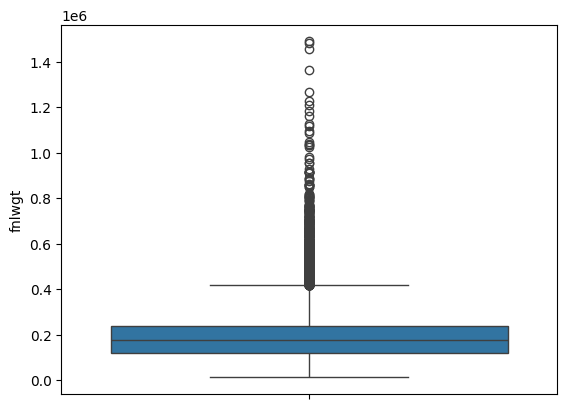

In [182]:
# Plotting to visualize
import matplotlib.pyplot as plt
import seaborn as sns

checkVisualisedf = adult_df_cleaned
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#sns.boxplot(x=checkVisualisedf['capital-gain'], ax=axes[0]).set_title('Capital gain')
sns.boxplot(data = checkVisualisedf['fnlwgt'])
plt.show()

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

checkVisualisedf = adult_df_cleaned
# Select numeric columns
numeric_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_data = checkVisualisedf[numeric_columns]
# Calculate Z-scores
#z_scores = np.abs(stats.zscore(numeric_data))
z_scores = numeric_data.apply(zscore).abs()
print(z_scores)
# Set a threshold for what you consider an outlier (e.g., Z-score > 3)
threshold = 3

# Display the outliers
outliers_list = {}
for col in numeric_columns:
    # Identify outliers in the column
    is_outlier = z_scores[col] > threshold
    outliers_in_col = numeric_data[col][is_outlier]
    
    # Store outliers in the list
    outliers_list[col] = outliers_in_col
    
    # Print results
    num_outliers = len(outliers_in_col)
    print(f"Outliers in '{col}': {num_outliers} found.")
    # if num_outliers > 0:
    #     print(outliers_in_col.head())  # Display first few outliers for each column

            age  education-num  capital-gain  capital-loss  hours-per-week
0      0.025996       1.136512      0.146932      0.217127        0.034087
1      0.828308       1.136512      0.144804      0.217127        2.213032
2      0.046942       0.419335      0.144804      0.217127        0.034087
3      1.047121       1.197259      0.144804      0.217127        0.034087
4      0.776316       1.136512      0.144804      0.217127        0.034087
...         ...            ...           ...           ...             ...
48837  0.025996       1.136512      0.144804      0.217127        0.356894
48838  1.849433       0.419335      0.144804      0.217127        0.034087
48839  0.046942       1.136512      0.144804      0.217127        0.772930
48840  0.390683       1.136512      0.587220      0.217127        0.034087
48841  0.265754       1.136512      0.144804      0.217127        1.579946

[48842 rows x 5 columns]
Outliers in 'age': 186 found.
Outliers in 'education-num': 330 found.
Outl

**Z-score is better for normally distributed data. IQR is better for non-normal data or when you're dealing with skewed distributions or extreme outliers.**

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

checkVisualisedf = adult_df_cleaned
# Select numeric columns
numeric_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_data = checkVisualisedf[numeric_columns]
# Use IQR method to find outliers
def find_outliers_iqr(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(str(upper_bound) + " -- " + str(lower_bound))
    return outliers

# Get outliers
outliers = find_outliers_iqr(numeric_data)
print(outliers)
# Output the number of outliers and some sample outlier values
for col, outlier_data in outliers.items():
    print(f"Outliers in '{col}': {len(outlier_data)} found.")
    print(outlier_data.head())  # Display the first few outliers for each column

78.0 -- -2.0
16.5 -- 4.5
0.0 -- 0.0
0.0 -- 0.0
52.5 -- 32.5
{'age': 74       79
222      90
430      80
918      81
1040     90
         ..
48524    80
48564    80
48667    83
48709    79
48812    81
Name: age, Length: 216, dtype: int64, 'education-num': 15       4
56       3
61       4
79       4
160      2
        ..
48638    4
48645    4
48766    4
48782    4
48791    4
Name: education-num, Length: 1794, dtype: int64, 'capital-gain': 0         2174
8        14084
9         5178
59        5013
60        2407
         ...  
48805     5178
48812     2936
48813     7688
48822    15024
48840     5455
Name: capital-gain, Length: 4035, dtype: int64, 'capital-loss': 23       2042
32       1408
52       1902
93       1573
96       1902
         ... 
48783    1602
48794    2057
48802    1590
48814    1669
48816    1902
Name: capital-loss, Length: 2282, dtype: int64, 'hours-per-week': 1        13
6        16
10       80
12       30
20       60
         ..
48820     8
48822    55
48825    32
48

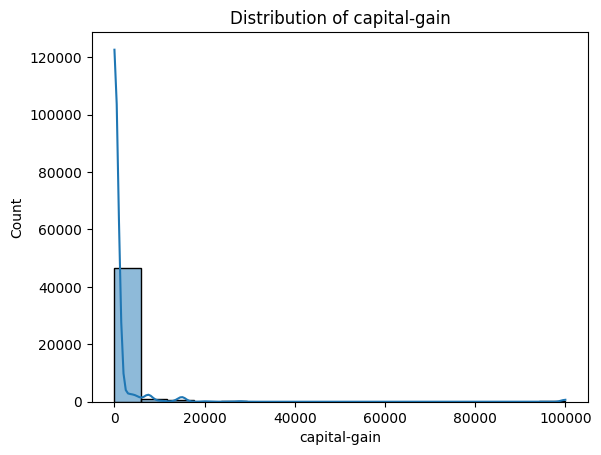

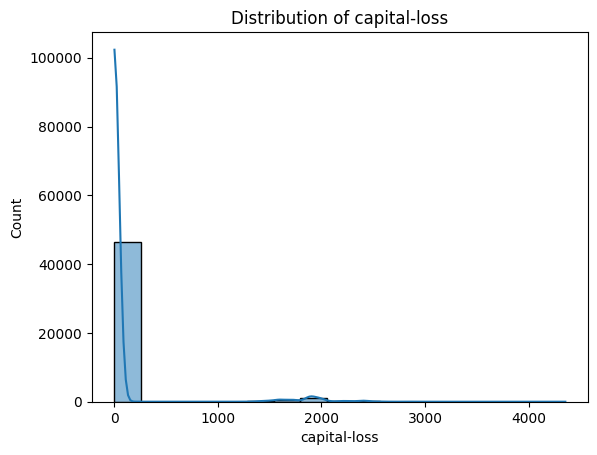

In [185]:
#Treating the outliers
#check for the skewness
sns.histplot(adult_df_cleaned['capital-gain'], kde=True)
plt.title('Distribution of capital-gain')
plt.show()

sns.histplot(adult_df_cleaned['capital-loss'], kde=True)
plt.title('Distribution of capital-loss')
plt.show()

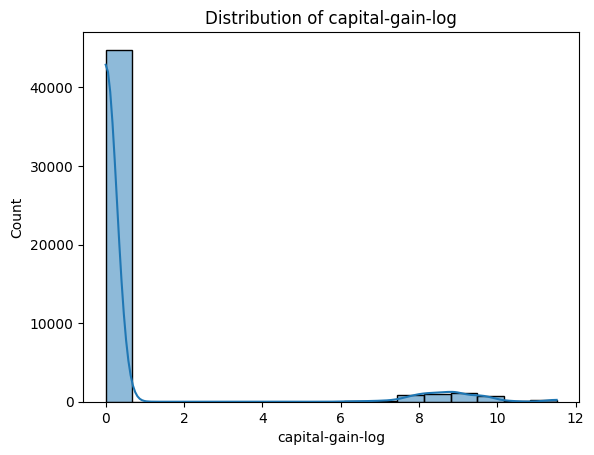

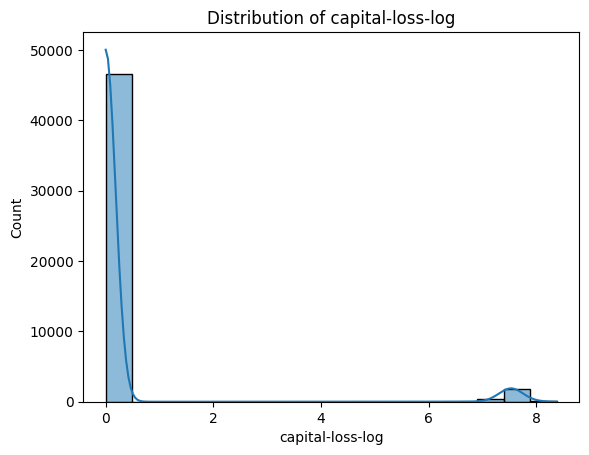

In [186]:
#applying log transformation and cheking the skeweness
adult_df_cleaned['capital-gain-log'] = np.log(adult_df_cleaned['capital-gain'] + 1)
adult_df_cleaned['capital-loss-log'] = np.log(adult_df_cleaned['capital-loss'] + 1)

sns.histplot(adult_df_cleaned['capital-gain-log'], kde=True)
plt.title('Distribution of capital-gain-log')
plt.show()

sns.histplot(adult_df_cleaned['capital-loss-log'], kde=True)
plt.title('Distribution of capital-loss-log')
plt.show()

In [187]:
# #applying square root transformation and cheking the skeweness
# adult_df_cleaned['capital-gain-sqrt'] = np.sqrt(adult_df_cleaned['capital-gain'])
# adult_df_cleaned['capital-loss-sqrt'] = np.sqrt(adult_df_cleaned['capital-loss'])

# sns.histplot(adult_df_cleaned['capital-gain-sqrt'], kde=True)
# plt.title('Distribution of capital-gain-sqrt')
# plt.show()

# sns.histplot(adult_df_cleaned['capital-loss-sqrt'], kde=True)
# plt.title('Distribution of capital-loss-sqrt')
# plt.show()

In [188]:
# #clipping the extreme values
# adult_df_cleaned['capital-gain-clipped'] = adult_df_cleaned['capital-gain'].clip(upper=adult_df_cleaned['capital-gain'].quantile(0.95))
# adult_df_cleaned['capital-loss-clipped'] = adult_df_cleaned['capital-loss'].clip(upper=adult_df_cleaned['capital-loss'].quantile(0.95))

# #adult_df_cleaned[['capital-gain','capital-gain-clipped']].head(20)
# adult_df_cleaned[(adult_df_cleaned['capital-gain']!=0)  & (adult_df_cleaned['capital-gain-clipped'] != 0)][['capital-gain','capital-gain-clipped']]


In [189]:
# #checking the skewness after clipping the extreme values
# sns.histplot(adult_df_cleaned['capital-gain-clipped'], kde=True)
# plt.title('Distribution of capital-gain-clipped')
# plt.show()

# sns.histplot(adult_df_cleaned['capital-loss-clipped'], kde=True)
# plt.title('Distribution of capital-loss-clipped')
# plt.show()

In [190]:
# #box cox 
# adult_df_cleaned['capital-gain-boxcox'], _ = stats.boxcox(adult_df_cleaned['capital-gain'] + 1)
# adult_df_cleaned['capital-loss-boxcox'], _ = stats.boxcox(adult_df_cleaned['capital-loss'] + 1)

# sns.histplot(adult_df_cleaned['capital-gain-boxcox'], kde=True)
# plt.title('Distribution of capital-gain-boxcox')
# plt.show()

# sns.histplot(adult_df_cleaned['capital-loss-boxcox'], kde=True)
# plt.title('Distribution of capital-loss-boxcox')
# plt.show()

In [191]:
#checking for outliers in hours-per-week column
adult_df_cleaned[adult_df_cleaned['hours-per-week']>90][['workclass','occupation','hours-per-week']]

,workclass,occupation,hours-per-week
272,Self-emp-not-inc,Farming-fishing,98
935,Private,Craft-repair,99
1172,Private,Farming-fishing,99
1887,Self-emp-not-inc,Farming-fishing,99
2920,Self-emp-not-inc,Farming-fishing,98
...,...,...,...
47107,State-gov,Prof-specialty,99
47376,Private,Prof-specialty,99
47760,Private,Transport-moving,99
48130,Self-emp-inc,Exec-managerial,92


In [192]:
# #applying log transformation and cheking the skeweness
# adult_df_cleaned['hours-per-week-log'] = np.log(adult_df_cleaned['hours-per-week'] + 1)


# sns.histplot(adult_df_cleaned['hours-per-week-log'], kde=True)
# plt.title('Distribution of hours-per-week-log')
# plt.show()


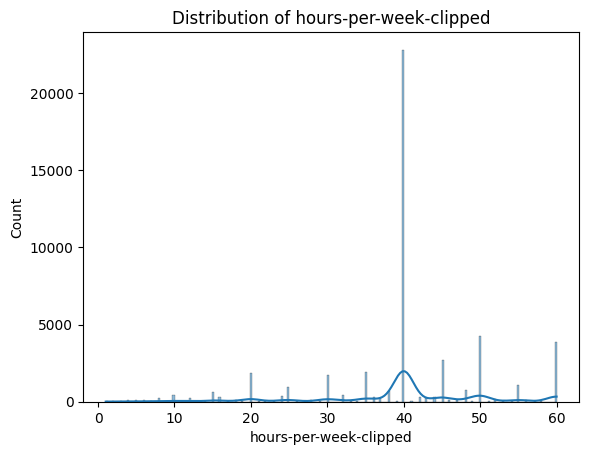

In [193]:
#clipping the extreme values
adult_df_cleaned['hours-per-week-clipped'] = adult_df_cleaned['hours-per-week'].clip(upper=adult_df_cleaned['hours-per-week'].quantile(0.95))

#checking the skewness after clipping the extreme values
sns.histplot(adult_df_cleaned['hours-per-week-clipped'], kde=True)
plt.title('Distribution of hours-per-week-clipped')
plt.show()


In [194]:
adult_df_cleaned['hours-per-week'].quantile(0.95)

np.float64(60.0)

**After trying different methods, decided to go with log transformation to treat the outliers because log transformation can help reduce the skewness of these columns(capital-gain and capital-loss) and lessen the impact of large values. Since both columns have values that are non-negative, log transformation works well to normalize the distribution. And decided to go with clipping extreme values for hours-per-week column.**

**Univariate Analysis**

Univariate Analysis of numerical columns

In [196]:
#checking for numerical columns
adult_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     48842 non-null  int64  
 1   workclass               48842 non-null  object 
 2   fnlwgt                  48842 non-null  int64  
 3   education               48842 non-null  object 
 4   education-num           48842 non-null  int64  
 5   marital-status          48842 non-null  object 
 6   occupation              48842 non-null  object 
 7   relationship            48842 non-null  object 
 8   race                    48842 non-null  object 
 9   sex                     48842 non-null  object 
 10  capital-gain            48842 non-null  int64  
 11  capital-loss            48842 non-null  int64  
 12  hours-per-week          48842 non-null  int64  
 13  native-country          48842 non-null  object 
 14  income                  48842 non-null

In [197]:
#checking the first 10 rows of the dataset
adult_df_cleaned.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital-gain-log,capital-loss-log,hours-per-week-clipped
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7.684784,0.0,40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.000000,0.0,13
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.000000,0.0,40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0,40
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.000000,0.0,40
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0.000000,0.0,40
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0.000000,0.0,16
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0.000000,0.0,45
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,9.552866,0.0,50
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,8.552367,0.0,40


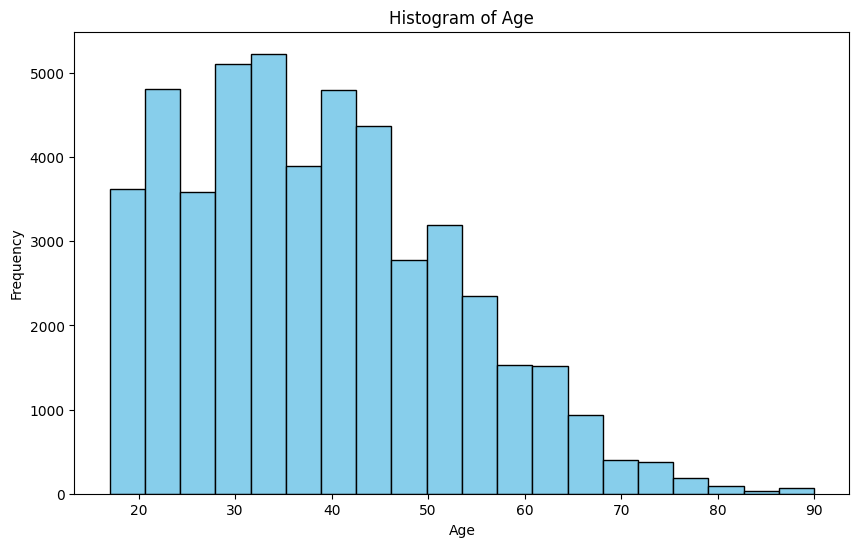

In [198]:
#histogram of age column
plt.figure(figsize=(10, 6))
plt.hist(adult_df_cleaned['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

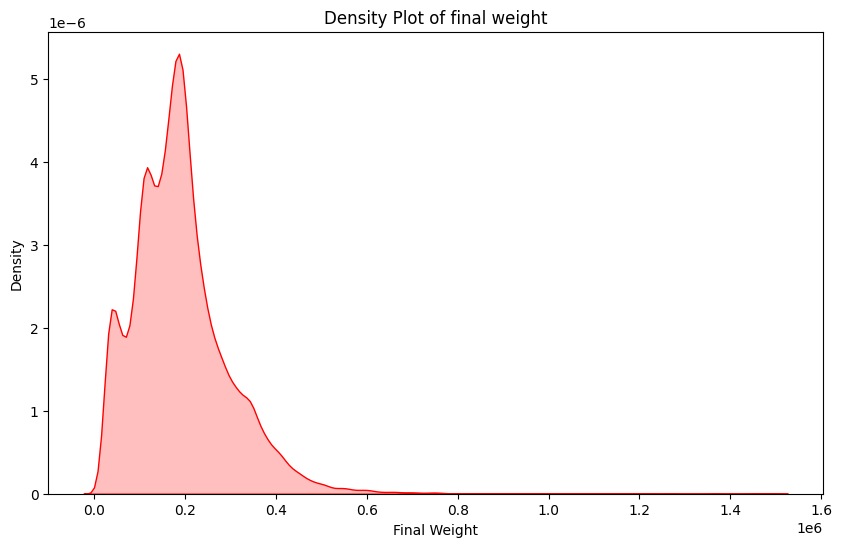

In [199]:
#density plot of fnlwgt column
plt.figure(figsize=(10, 6))
sns.kdeplot(adult_df_cleaned['fnlwgt'], shade=True, color='red')
plt.title('Density Plot of final weight')
plt.xlabel('Final Weight')
plt.ylabel('Density')
plt.show()

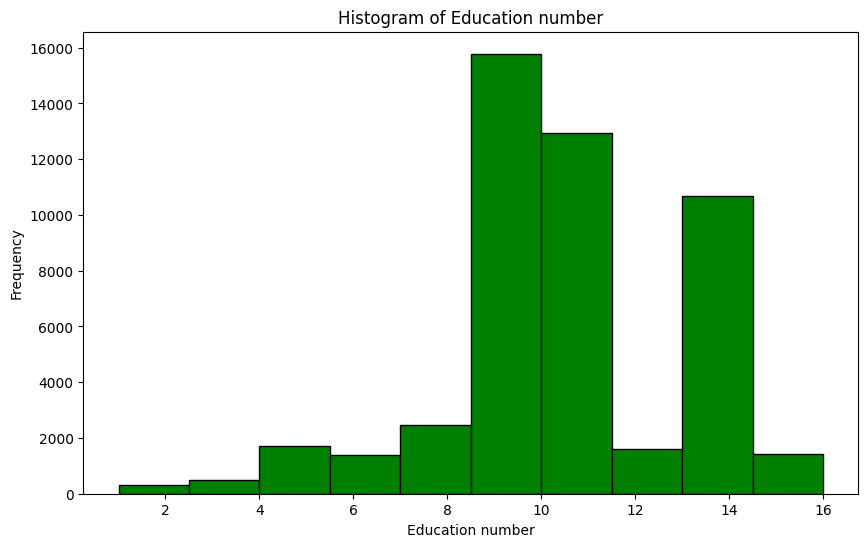

In [200]:
#education num
plt.figure(figsize=(10, 6))
plt.hist(adult_df_cleaned['education-num'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Education number')
plt.xlabel('Education number')
plt.ylabel('Frequency')
plt.show()

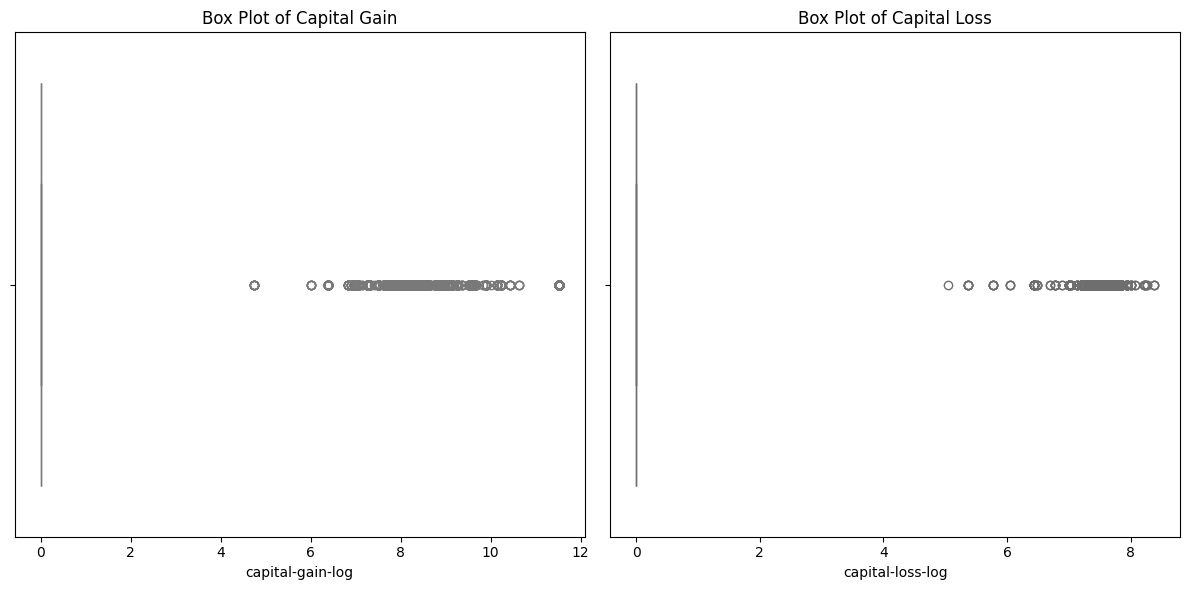

In [201]:
# creating with two subplots for capital gain and capital loss
plt.figure(figsize=(12, 6))

# box plot for capital gain
plt.subplot(1, 2, 1)
sns.boxplot(x=adult_df_cleaned['capital-gain-log'], color='lightblue')
plt.title('Box Plot of Capital Gain')

# box plot for capital loss
plt.subplot(1, 2, 2)
sns.boxplot(x=adult_df_cleaned['capital-loss-log'], color='lightcoral')
plt.title('Box Plot of Capital Loss')

plt.tight_layout()
plt.show()

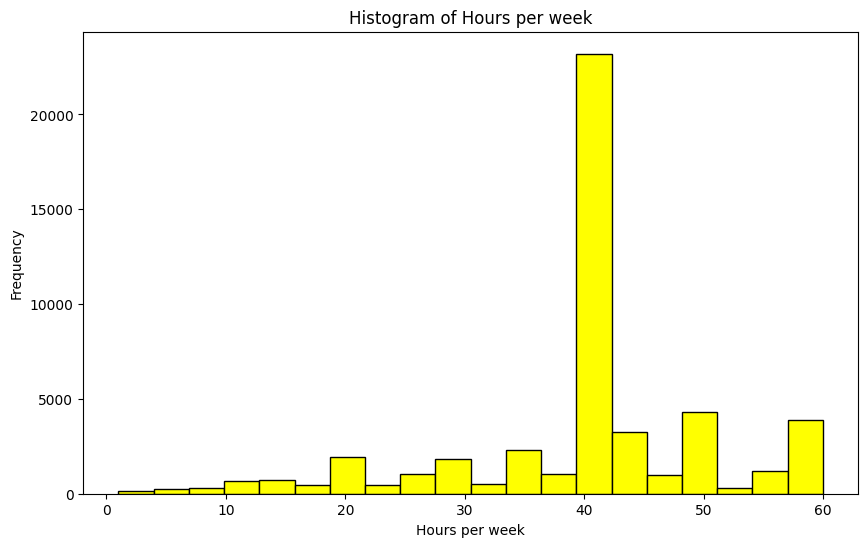

In [202]:
#histogram of hours per week column
plt.figure(figsize=(10, 6))
plt.hist(adult_df_cleaned['hours-per-week-clipped'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Hours per week')
plt.xlabel('Hours per week')
plt.ylabel('Frequency')
plt.show()

Univariate Analysis for categorical columns

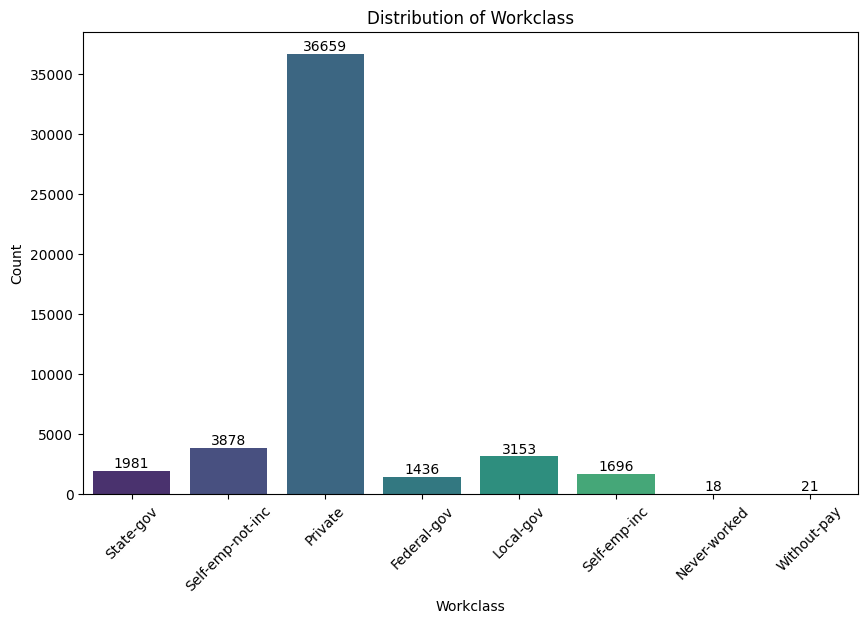

In [203]:
#bar plot for workclass column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='workclass', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

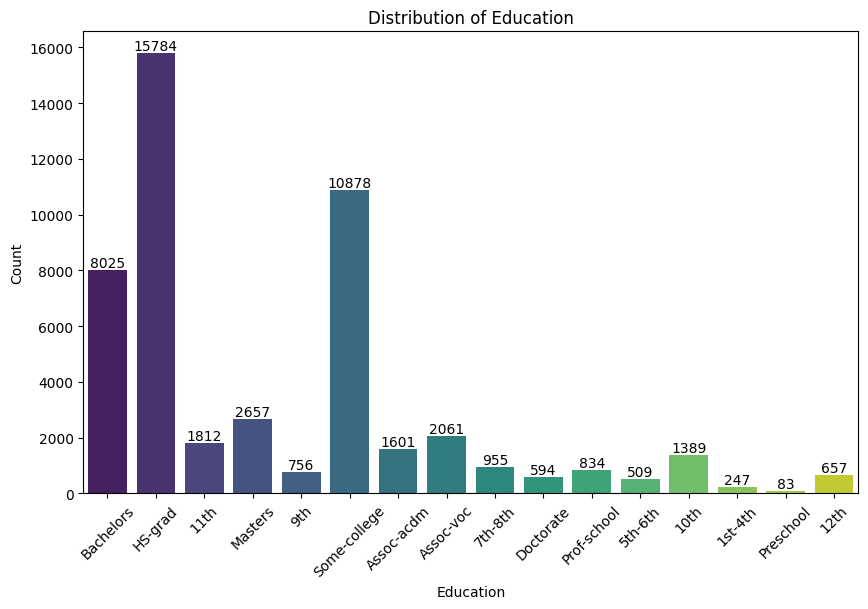

In [204]:
#bar plot for education column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='education', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

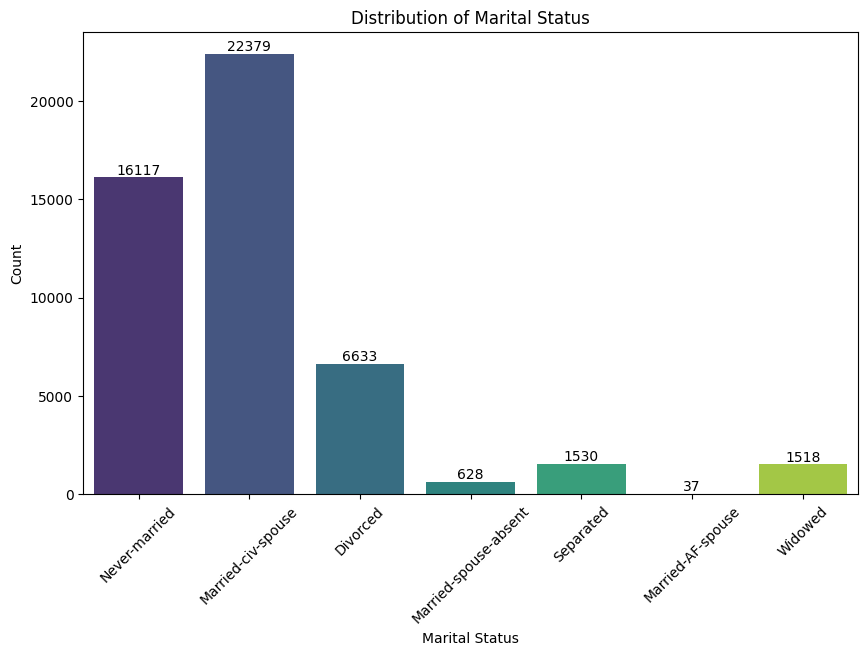

In [205]:
#bar plot for marital status column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='marital-status', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

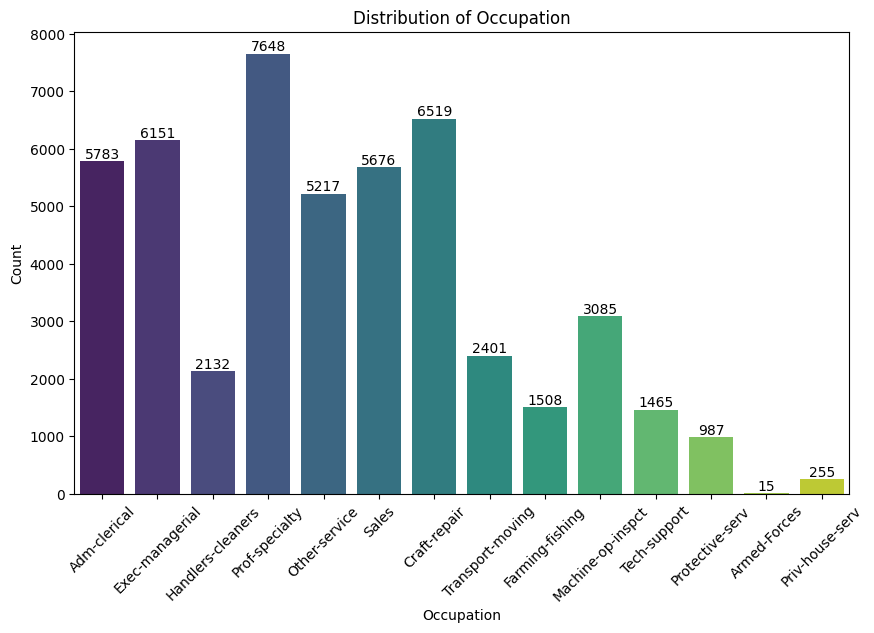

In [206]:
#bar plot for occupation column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='occupation', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

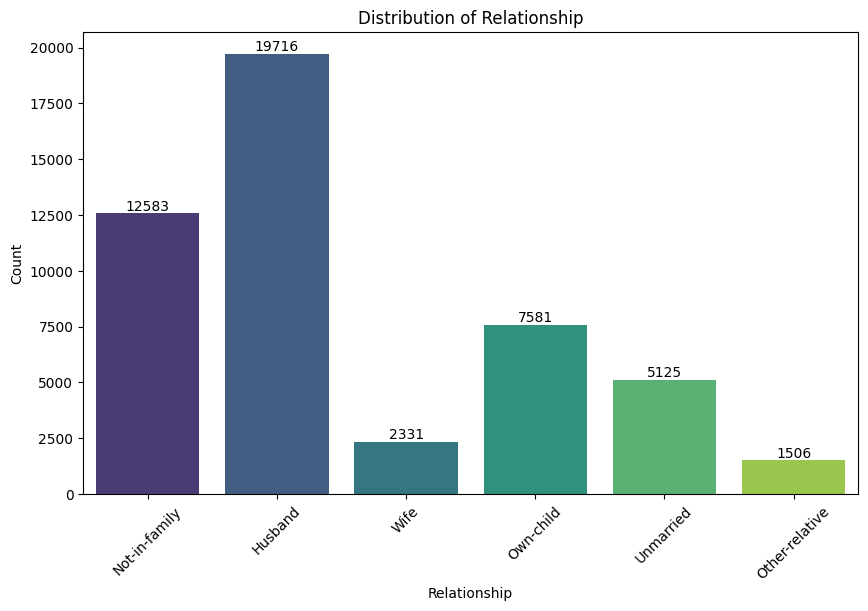

In [207]:
#bar plot for realtionship column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='relationship', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

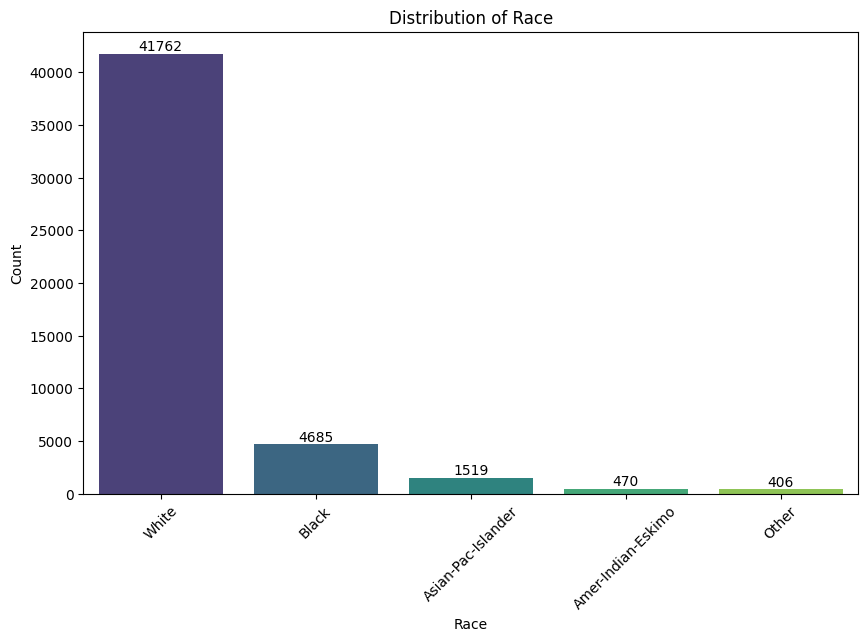

In [208]:
#bar plot for race column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='race', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

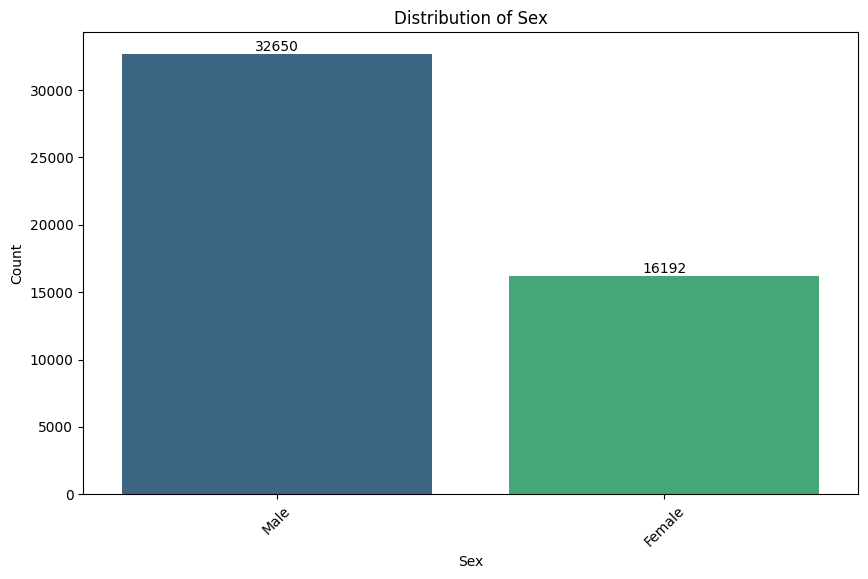

In [209]:
#bar plot for sex column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='sex', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

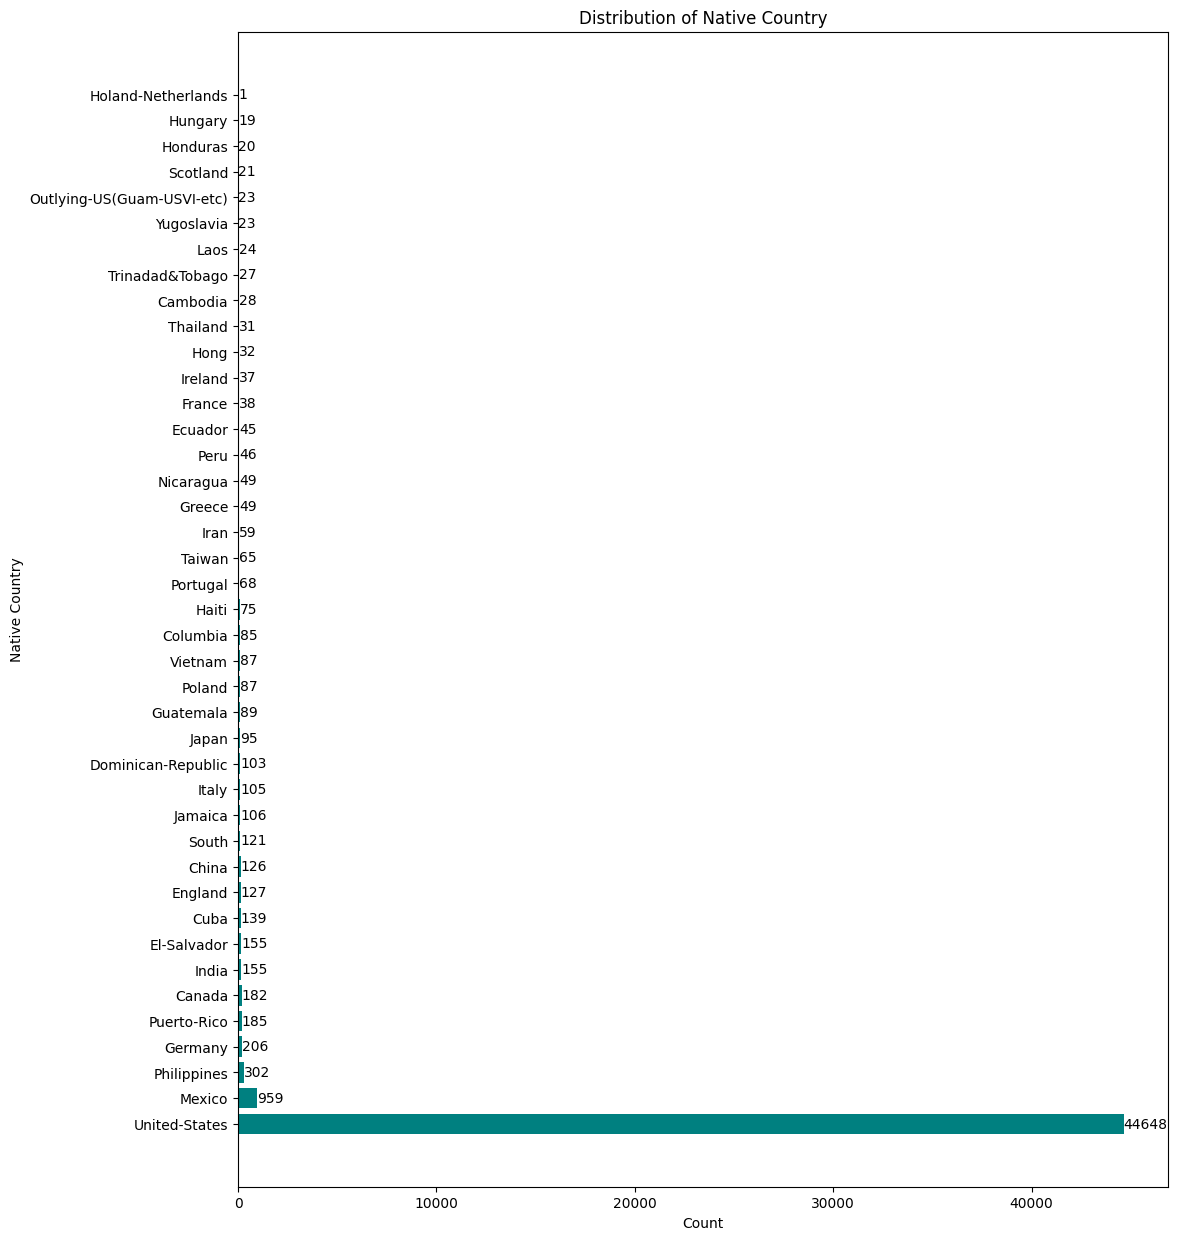

In [210]:
#bar plot for native country
counts = adult_df_cleaned['native-country'].value_counts()
categories = counts.index
values = counts.values

plt.figure(figsize=(12, 15))
plt.barh(categories, values, color='teal')
plt.title('Distribution of Native Country')
plt.xlabel('Count')
plt.ylabel('Native Country')

# annotate bars with counts
for index, value in enumerate(values):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.show()

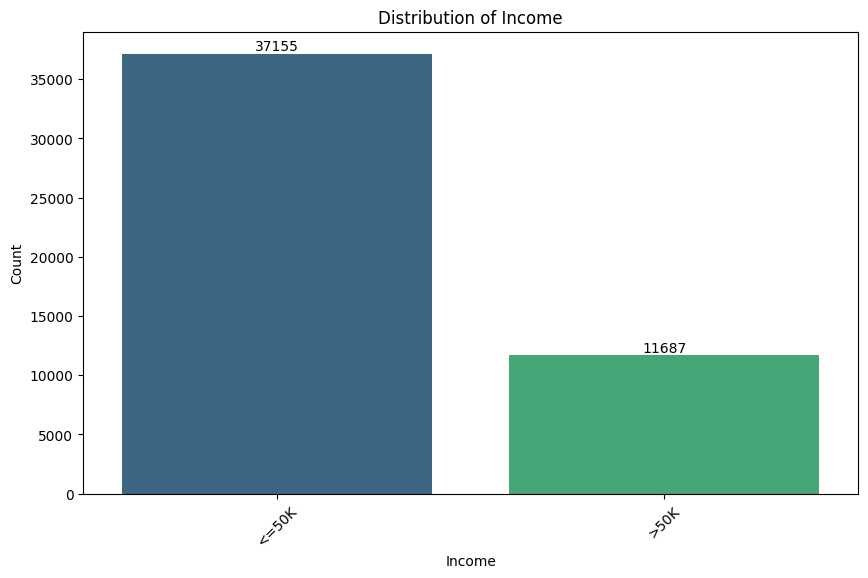

In [211]:
#bar plot for income
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=adult_df_cleaned, x='income', palette='viridis')
# annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points', 
                fontsize=10) 
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

**Bivariate Analysis**

In [213]:
adult_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     48842 non-null  int64  
 1   workclass               48842 non-null  object 
 2   fnlwgt                  48842 non-null  int64  
 3   education               48842 non-null  object 
 4   education-num           48842 non-null  int64  
 5   marital-status          48842 non-null  object 
 6   occupation              48842 non-null  object 
 7   relationship            48842 non-null  object 
 8   race                    48842 non-null  object 
 9   sex                     48842 non-null  object 
 10  capital-gain            48842 non-null  int64  
 11  capital-loss            48842 non-null  int64  
 12  hours-per-week          48842 non-null  int64  
 13  native-country          48842 non-null  object 
 14  income                  48842 non-null

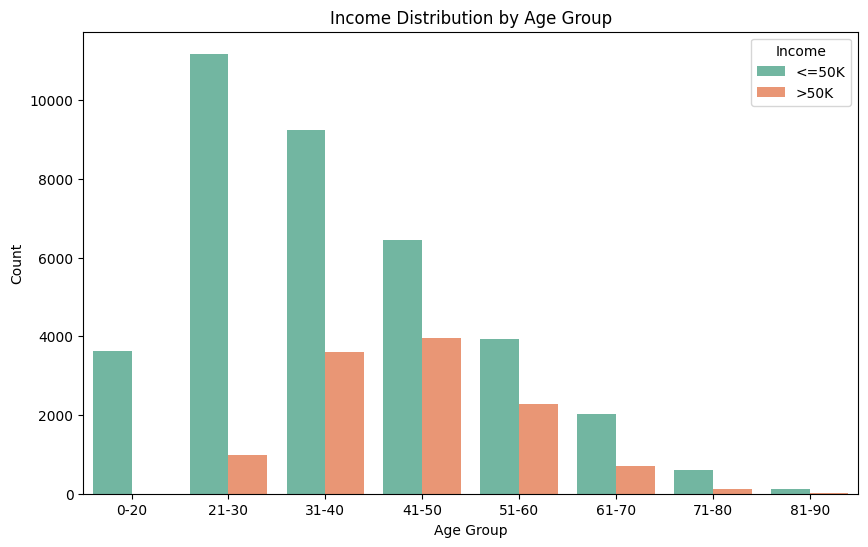

In [214]:
#relationship between age and income
# define age bins and labels
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# create a new column for age bins
adult_df_cleaned['age_group'] = pd.cut(adult_df_cleaned['age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='income', data=adult_df_cleaned, palette='Set2')

# add labels and title
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Income')

plt.show()

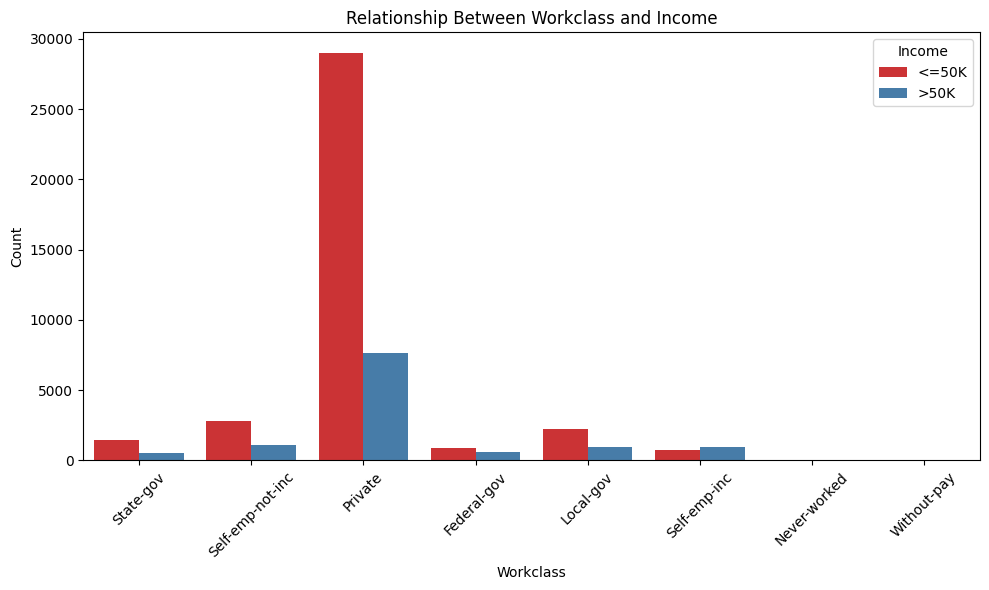

In [215]:
#workclass Vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income', data=adult_df_cleaned, palette='Set1')

# add labels and title
plt.title('Relationship Between Workclass and Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

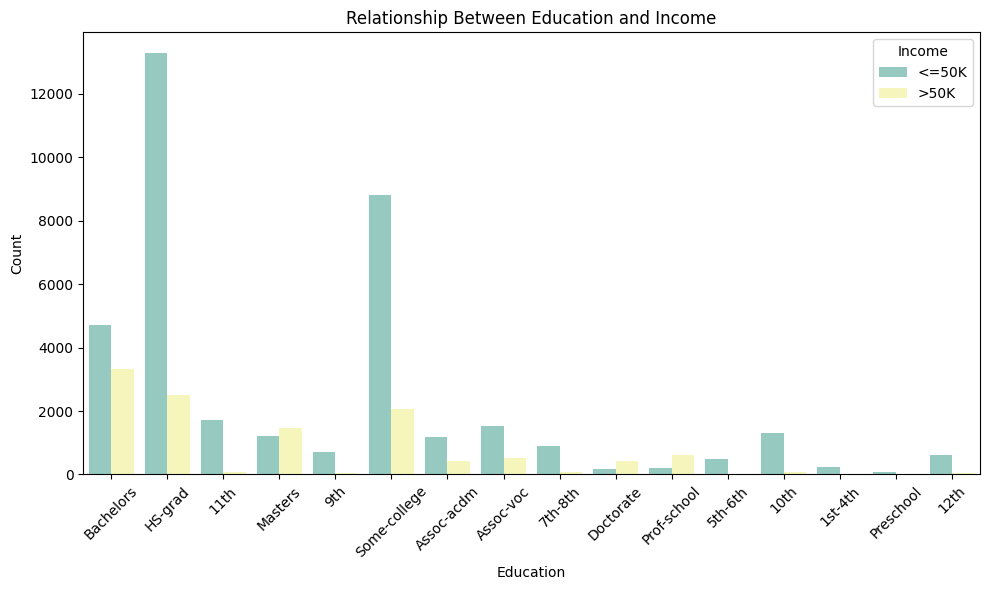

In [217]:
#education Vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=adult_df_cleaned, palette='Set3')

# add labels and title
plt.title('Relationship Between Education and Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

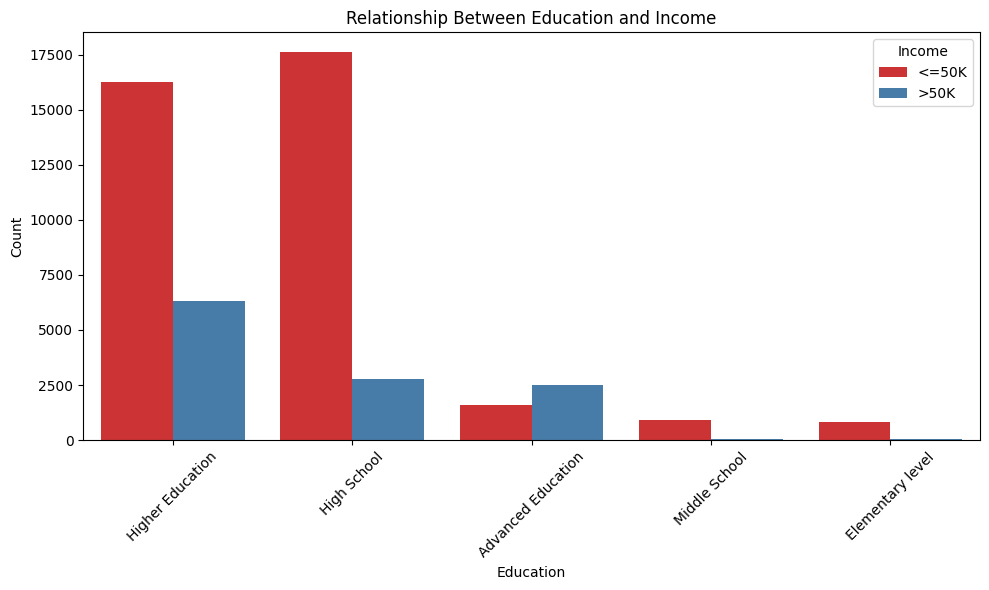

In [218]:
# comparing education level with income
# define the bins for education
def assign_education_bin(row):
    if row['education-num'] <= 3:
        return 'Elementary level'
    elif row['education-num'] == 4:
        return 'Middle School'
    elif 5 <= row['education-num'] <= 9:
        return 'High School'
    elif 10 <= row['education-num'] <= 13:
        return 'Higher Education'
    elif 14 <= row['education-num'] <= 16:
        return 'Advanced Education'

# apply the function to create a new 'education_bin' column
adult_df_cleaned['education_bin'] = adult_df_cleaned.apply(assign_education_bin, axis=1)

# display the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='education_bin', hue='income', data=adult_df_cleaned, palette='Set1')

# add labels and title
plt.title('Relationship Between Education Number and Income')
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

In [219]:
adult_df_cleaned['education']

0        Bachelors
1        Bachelors
2          HS-grad
3             11th
4        Bachelors
           ...    
48837    Bachelors
48838      HS-grad
48839    Bachelors
48840    Bachelors
48841    Bachelors
Name: education, Length: 48842, dtype: object

In [220]:
# # Set education as the index for better plotting
# #adult_df_cleaned.set_index('education', inplace=True)
# # Grouping the data by 'education' and 'income', and counting the occurrences
# grouped_data = adult_df_cleaned.groupby(['education', 'income']).size().unstack()
# # Plotting the stacked bar chart
# adult_df_cleaned.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# # Add labels and title
# plt.title('Income Distribution by Education Level', fontsize=14)
# plt.xlabel('Education Level')
# plt.ylabel('Count of Income')

# # Show legend and plot
# plt.legend(title='Income')
# plt.tight_layout()
# plt.show()

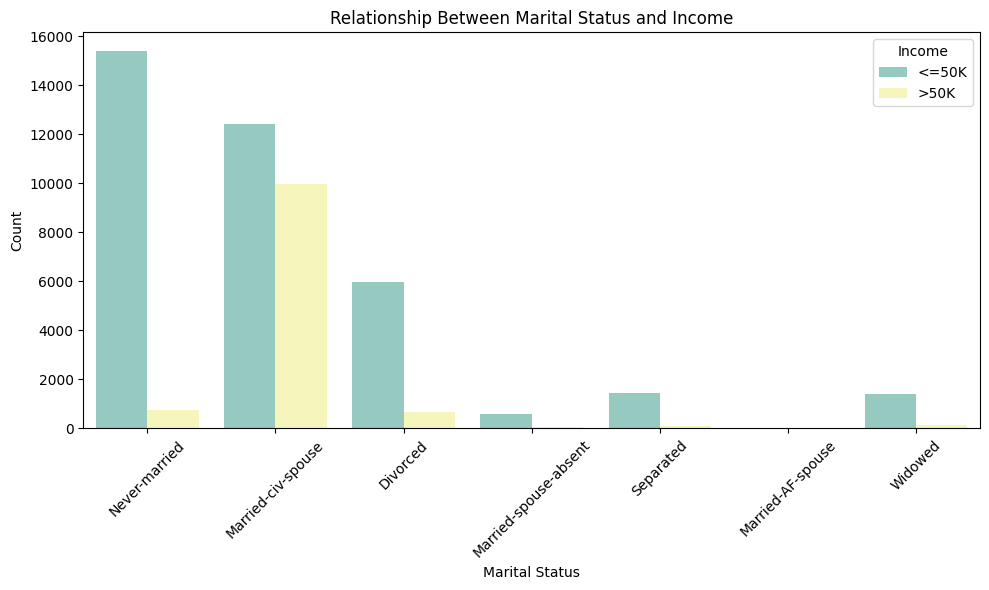

In [221]:
#marital status vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', hue='income', data=adult_df_cleaned, palette='Set3')

# add labels and title
plt.title('Relationship Between Marital Status and Income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

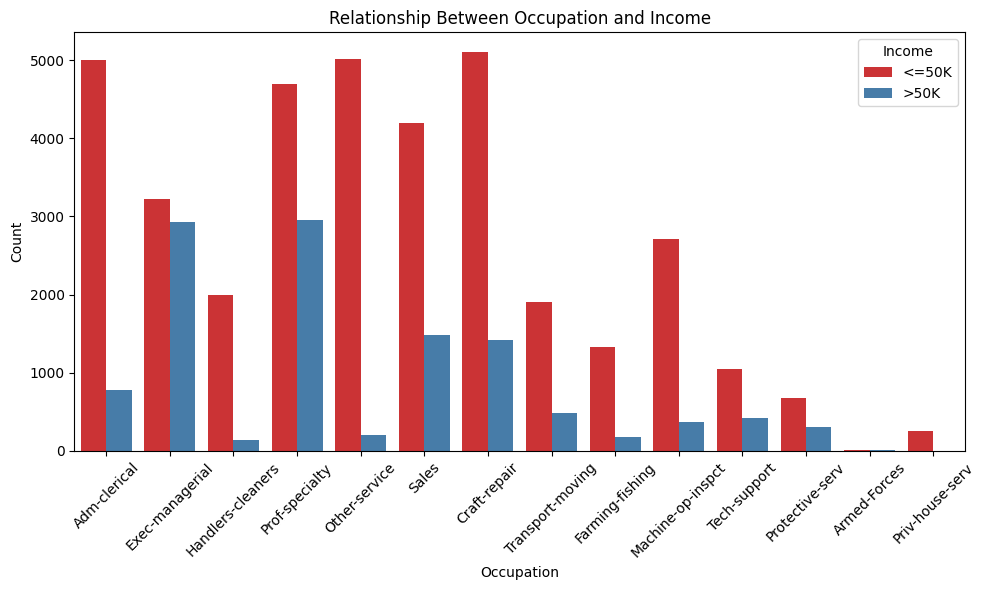

In [222]:
#occupation vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='income', data=adult_df_cleaned, palette='Set1')

# add labels and title
plt.title('Relationship Between Occupation and Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

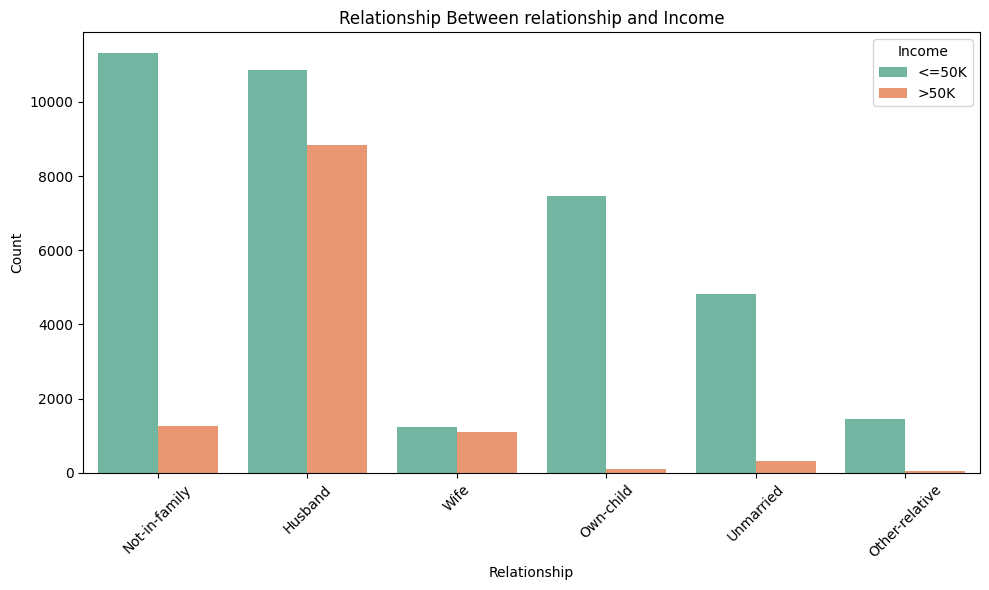

In [223]:
#relationship vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', hue='income', data=adult_df_cleaned, palette='Set2')

# add labels and title
plt.title('Relationship Between relationship and Income')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

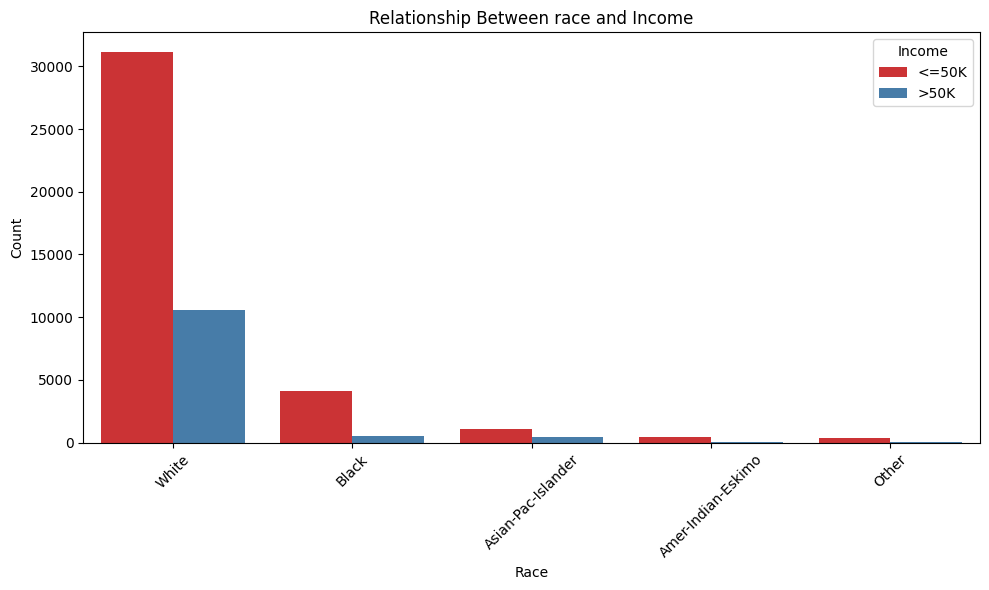

In [224]:
#race vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='income', data=adult_df_cleaned, palette='Set1')

# add labels and title
plt.title('Relationship Between race and Income')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

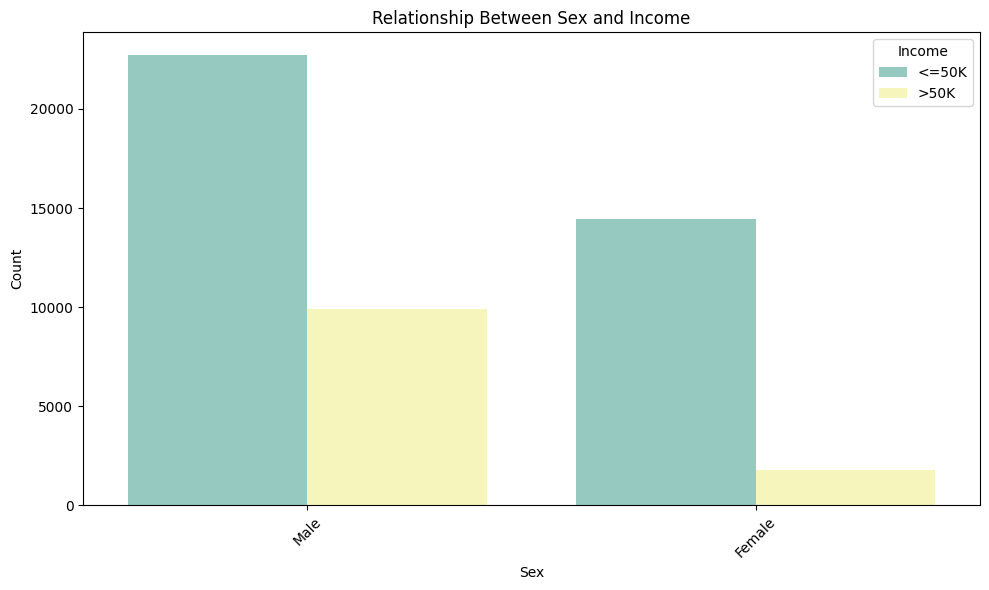

In [225]:
#sex vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=adult_df_cleaned, palette='Set3')

# add labels and title
plt.title('Relationship Between Sex and Income')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)  

plt.legend(title='Income')
plt.tight_layout()
plt.show()

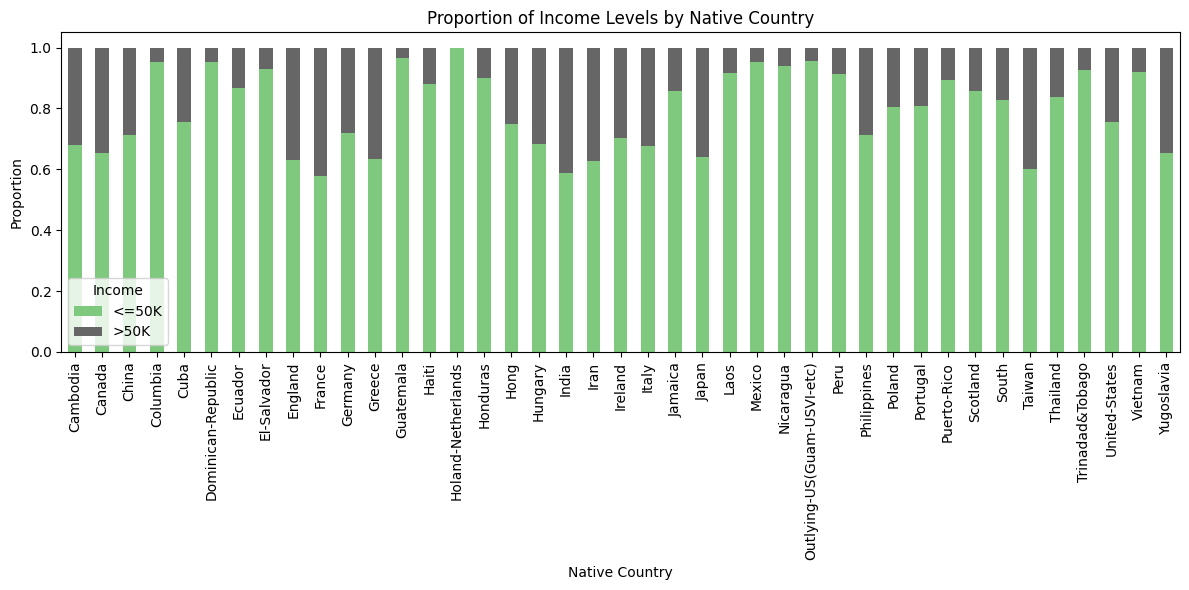

In [226]:
#native country vs income
# normalizing the data to show proportions
proportions = adult_df_cleaned.groupby(['native-country', 'income']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# plotting the proportional stacked bar plot
proportions.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')

# adding title and labels
plt.title('Proportion of Income Levels by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Income')

plt.tight_layout()
plt.show()

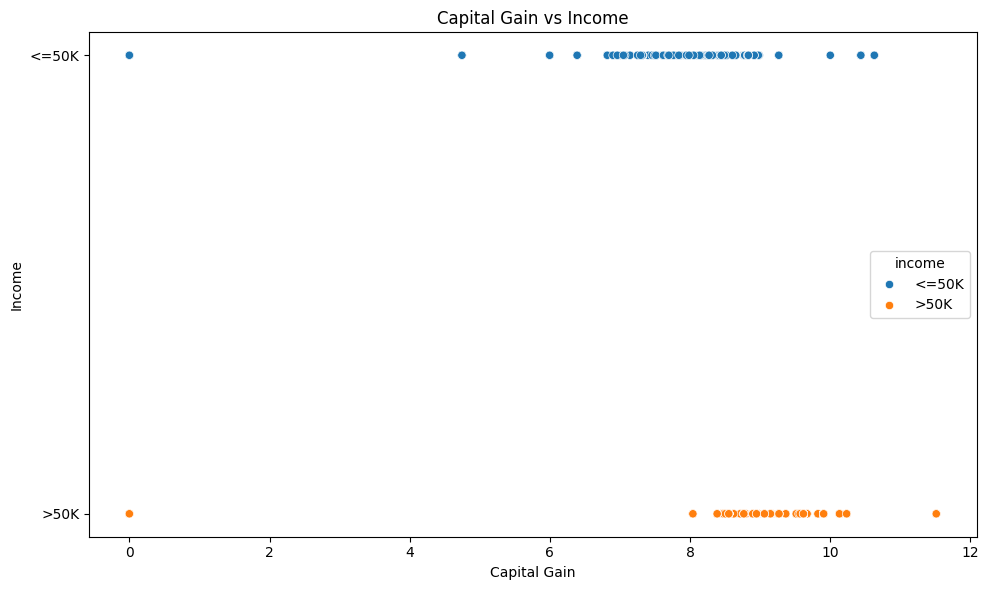

In [227]:
#capital gain vs income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capital-gain-log', y='income', hue='income', data = adult_df_cleaned)

# Add labels and title
plt.title('Capital Gain vs Income')
plt.xlabel('Capital Gain')
plt.ylabel('Income')

plt.tight_layout()
plt.show()

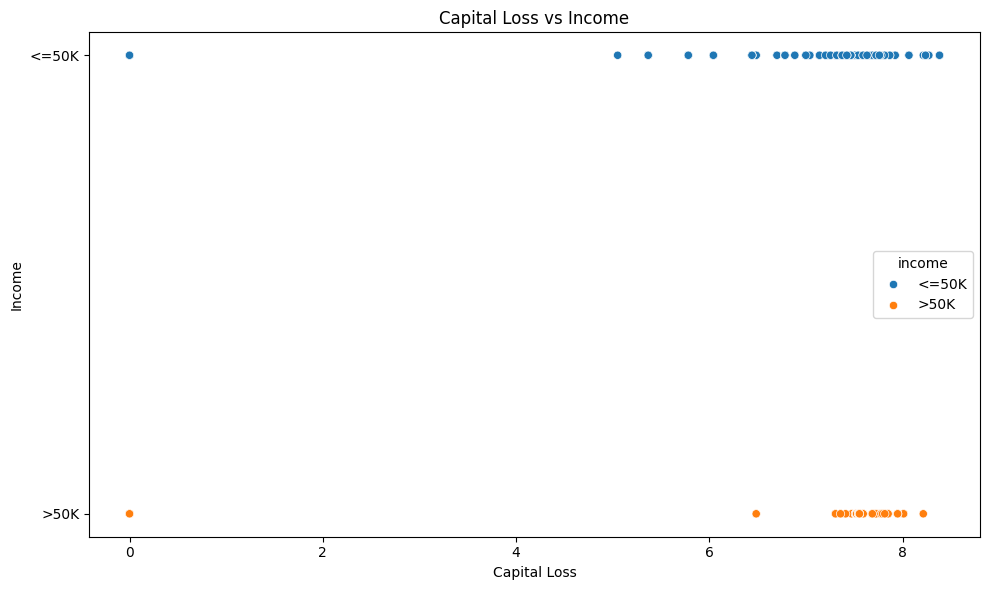

In [228]:
#capital loss vs income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capital-loss-log', y='income', hue='income', data = adult_df_cleaned)

# add labels and title
plt.title('Capital Loss vs Income')
plt.xlabel('Capital Loss')
plt.ylabel('Income')

plt.tight_layout()
plt.show()

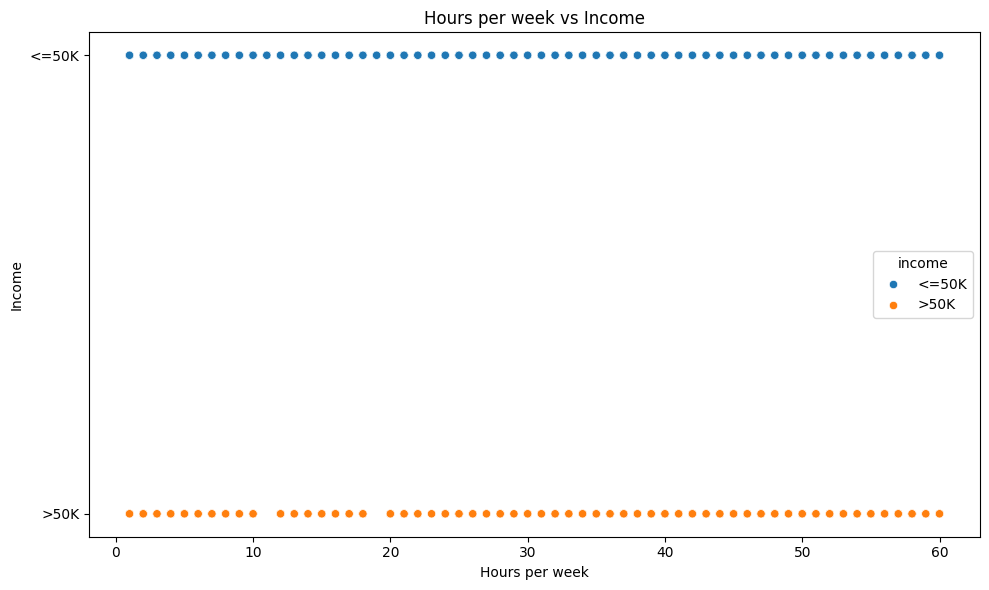

In [229]:
#hours per week vs income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours-per-week-clipped', y='income', hue='income', data = adult_df_cleaned)

# add labels and title
plt.title('Hours per week vs Income')
plt.xlabel('Hours per week')
plt.ylabel('Income')

plt.tight_layout()
plt.show()

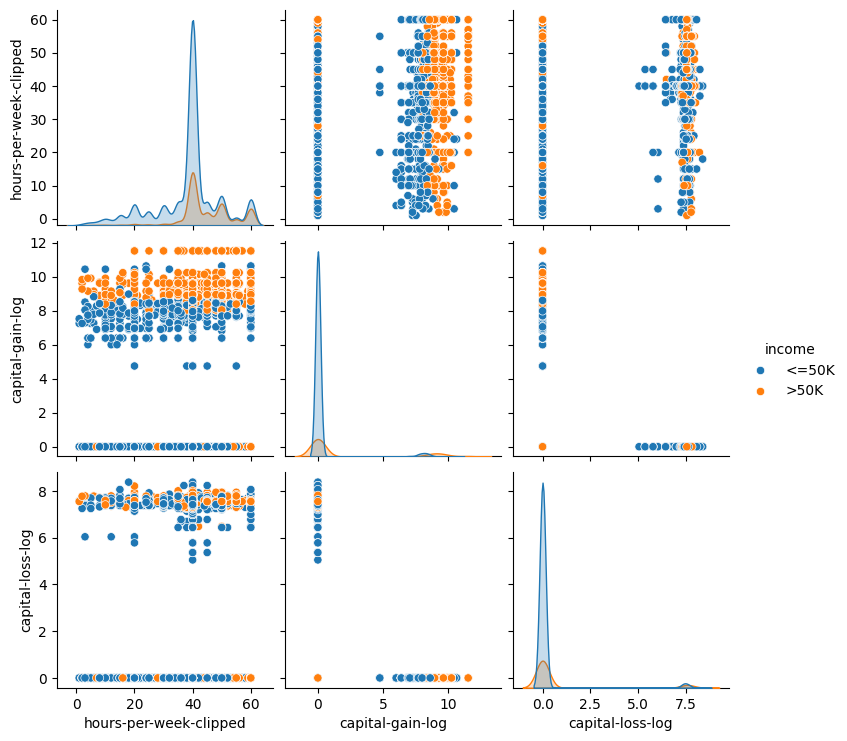

In [230]:
#pairwise scatter plots for numerical features
sns.pairplot(adult_df_cleaned[['hours-per-week-clipped', 'capital-gain-log', 'capital-loss-log', 'income']], hue='income')
plt.show()

                             age  education-num  hours-per-week-clipped  \
age                     1.000000       0.030940                0.070738   
education-num           0.030940       1.000000                0.157329   
hours-per-week-clipped  0.070738       0.157329                1.000000   
capital-gain-log        0.123892       0.129068                0.088339   
capital-loss-log        0.051706       0.078352                0.055207   

                        capital-gain-log  capital-loss-log  
age                             0.123892          0.051706  
education-num                   0.129068          0.078352  
hours-per-week-clipped          0.088339          0.055207  
capital-gain-log                1.000000         -0.065919  
capital-loss-log               -0.065919          1.000000  


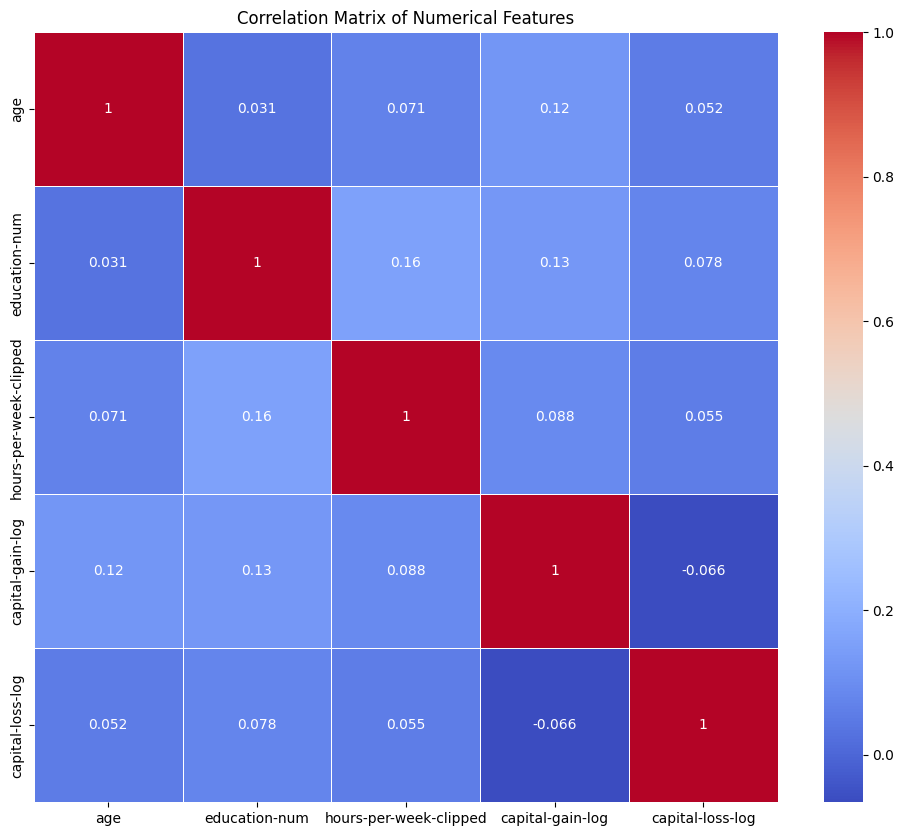

In [231]:
# correlation Analysis for Numerical Variables
# selecting numerical columns for correlation
numerical_cols = ['age', 'education-num', 'hours-per-week-clipped', 'capital-gain-log', 'capital-loss-log']

# correlation matrix
corr_matrix = adult_df_cleaned[numerical_cols].corr(method = 'pearson')
print(corr_matrix)

# plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Based on the above correlation matrix we can say that none of the numerical features is strongly correlated 
with each other.**

**Multivariate Analysis**

In [151]:
# from mpl_toolkits.mplot3d import Axes3D

# # Create a 3D scatter plot
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Map income categories to colors
# colors = {'<=50K': 'green', '>50K': 'red'}
# income_colors = adult_df_cleaned['income'].map(colors)

# # Plot age, capital_gain, hours_per_week in 3D
# ax.scatter(adult_df_cleaned['age'], adult_df_cleaned['capital-gain-log'], 
#            adult_df_cleaned['hours-per-week-clipped'], c=income_colors, s=50)
# legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='<=50K', 
#                             markerfacecolor='blue', markersize=10),
#                  plt.Line2D([0], [0], marker='o', color='w', label='>50K', 
#                             markerfacecolor='red', markersize=10)]

# # Set labels
# ax.set_xlabel('Age')
# ax.set_ylabel('Capital Gain')
# ax.set_zlabel('Hours per Week')


# ax.legend(handles=legend_labels, title='Income')
# ax.set_title('3D Plot: Age, Capital Gain, and Hours per Week')

# plt.show()

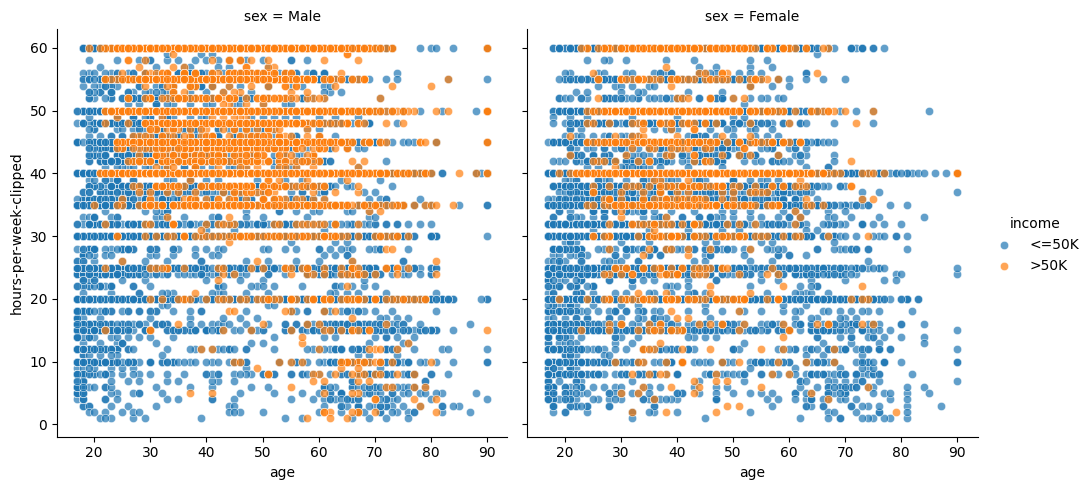

In [152]:
# Create a FacetGrid with age, hours_per_week, and income
g = sns.FacetGrid(adult_df_cleaned, col="sex", hue="income", height=5)
g.map(sns.scatterplot, "age", "hours-per-week-clipped", alpha=0.7)
g.add_legend()
plt.show()

In [232]:
adult_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     48842 non-null  int64   
 1   workclass               48842 non-null  object  
 2   fnlwgt                  48842 non-null  int64   
 3   education               48842 non-null  object  
 4   education-num           48842 non-null  int64   
 5   marital-status          48842 non-null  object  
 6   occupation              48842 non-null  object  
 7   relationship            48842 non-null  object  
 8   race                    48842 non-null  object  
 9   sex                     48842 non-null  object  
 10  capital-gain            48842 non-null  int64   
 11  capital-loss            48842 non-null  int64   
 12  hours-per-week          48842 non-null  int64   
 13  native-country          48842 non-null  object  
 14  income                

In [237]:
#relationship between education_bin,workclass,income and occupation
#cross-tabulation of education_bin,workclass,income and occupation
cross_tab = pd.crosstab([adult_df_cleaned['education_bin'], adult_df_cleaned['workclass']], 
                        [adult_df_cleaned['income'], adult_df_cleaned['occupation']])

cross_tab

income                                     <=50K                            \
occupation                          Adm-clerical Armed-Forces Craft-repair   
education_bin      workclass                                                 
Advanced Education Federal-gov                 3            0            1   
                   Local-gov                   9            0            0   
                   Private                    50            0           11   
                   Self-emp-inc                2            0            2   
                   Self-emp-not-inc            1            0            9   
                   State-gov                  14            0            1   
Elementary level   Federal-gov                 1            0            1   
                   Local-gov                   1            0            0   
                   Private                    14            0          102   
                   Self-emp-inc                0            0            0   
                   Self-emp-not-inc            0            0           13   
                   State-gov                   0            0            0   
High School        Federal-gov               155            6           27   
                   Local-gov                 139            0           98   
                   Never-worked                0            0            6   
                   Private                  1656            0         2586   
                   Self-emp-inc               14            0           54   
                   Self-emp-not-inc           23            0          385   
                   State-gov                 107            0           41   
                   Without-pay                 2            0            1   
Higher Education   Federal-gov               169            4           30   
                   Local-gov                 217            0           53   
                   Never-worked                0            0            0   
                   Private                  2150            0         1195   
                   Self-emp-inc               17            0           46   
                   Self-emp-not-inc           27            0          222   
                   State-gov                 211            0           28   
                   Without-pay                 1            0            0   
Middle School      Federal-gov                 1            0            0   
                   Local-gov                   2            0            5   
                   Never-worked                0            0            0   
                   Private                    15            0          150   
                   Self-emp-inc                0            0            6   
                   Self-emp-not-inc            1            0           27   
                   State-gov                   0            0            1   
                   Without-pay                 0            0            0   

income                                                               \
occupation                          Exec-managerial Farming-fishing   
education_bin      workclass                                          
Advanced Education Federal-gov                    9               0   
                   Local-gov                     18               0   
                   Private                      150               3   
                   Self-emp-inc                  13               0   
                   Self-emp-not-inc              26              13   
                   State-gov                     27               0   
Elementary level   Federal-gov                    0               0   
                   Local-gov                      0               1   
                   Private                        2              89   
                   Self-emp-inc                   1               1   
                   Self-emp-not-in

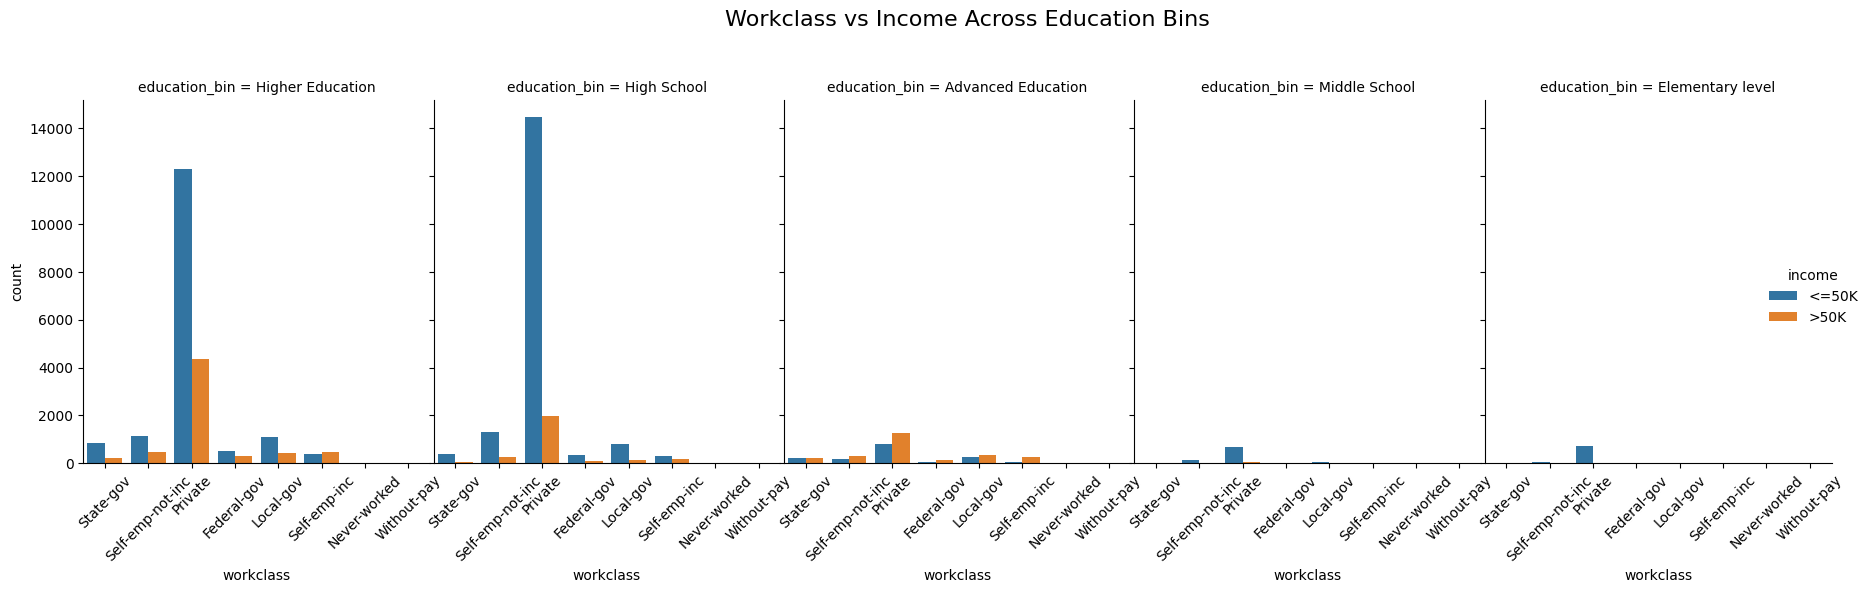

In [272]:
#relationship between education_bin,workclass,income and occupation in the form of visualizations
g = sns.catplot(x='workclass', hue='income', col='education_bin', data=adult_df_cleaned, 
                kind='count', height=8, aspect=2.5)
g.fig.set_size_inches(18, 5)
#rotate x-axis labels
g.set_xticklabels(rotation=45)

#adjust the layout to add space for the title and make it clearer
g.fig.subplots_adjust(top=0.8)
plt.suptitle('Workclass vs Income Across Education Bins', fontsize=16)

plt.show()

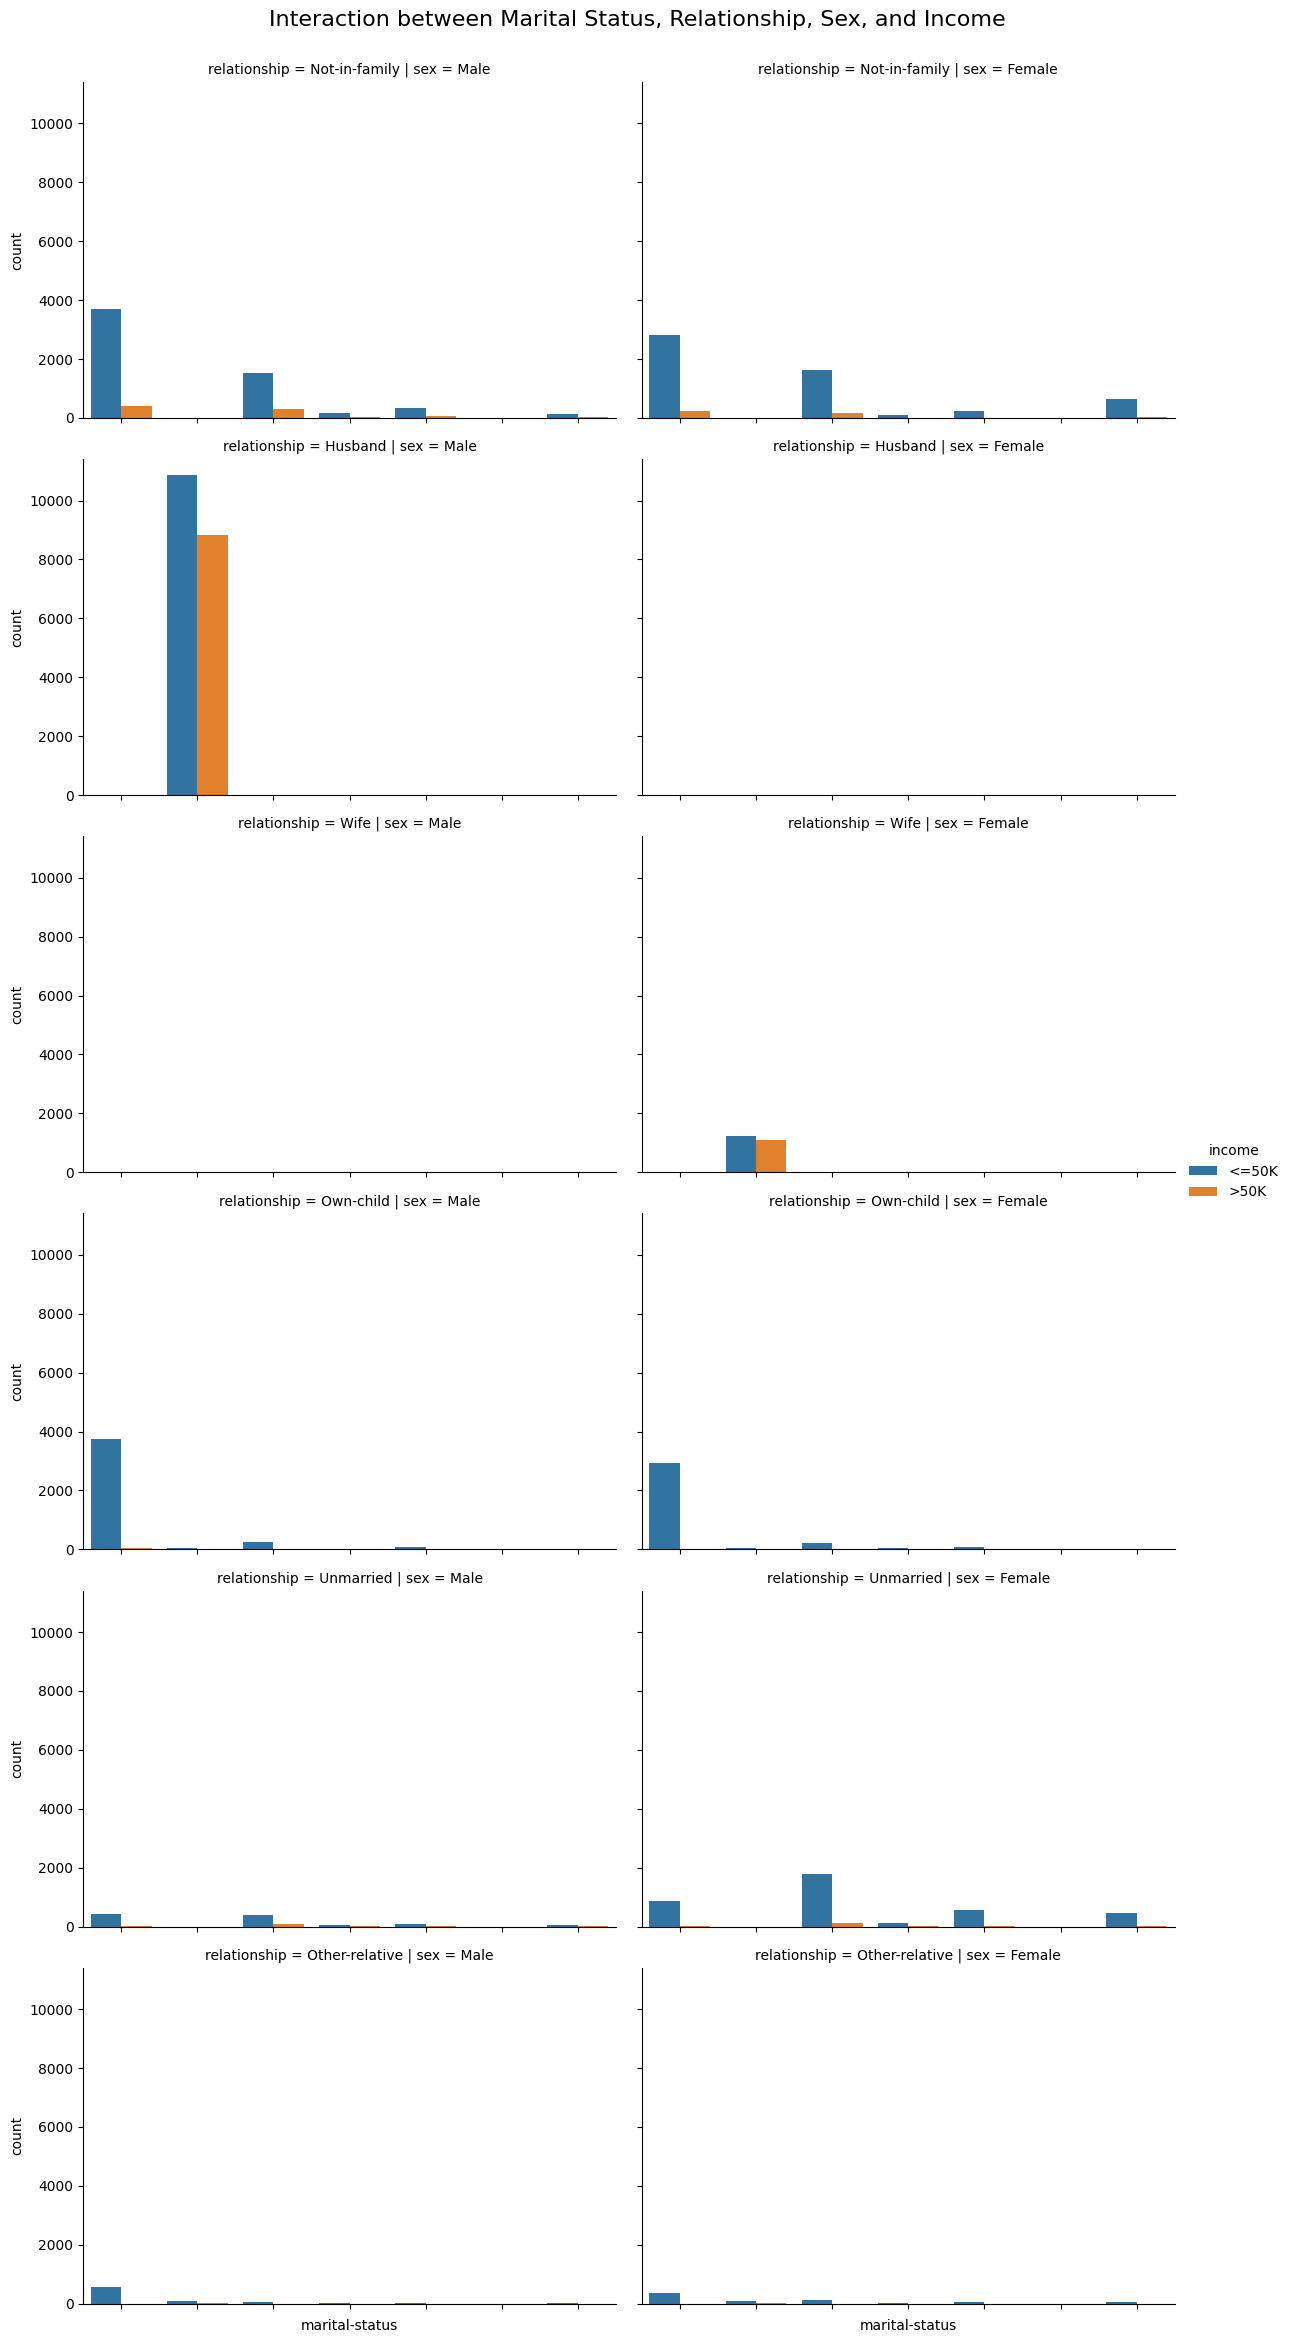

In [280]:
#relationship between marital status, relationship, sex and income
# use FacetGrid to explore the interaction
g = sns.catplot(x='marital-status', hue='income', col='sex', row='relationship', data=adult_df_cleaned, 
                kind='count', height=4, aspect=1.5)

# rotate x-axis labels
g.set_xticklabels(rotation=45)

# add title
plt.subplots_adjust(top=0.95)
plt.suptitle('Interaction between Marital Status, Relationship, Sex, and Income', fontsize=16)

plt.show()


In [287]:
#relationship of race,native-country,income
cross_tab = pd.crosstab([adult_df_cleaned['native-country']], 
                        [adult_df_cleaned['income'], adult_df_cleaned['race']])

cross_tab

income                                  <=50K                                 \
race                       Amer-Indian-Eskimo Asian-Pac-Islander Black Other   
native-country                                                                 
Cambodia                                    0                 15     2     0   
Canada                                      0                  0     0     2   
China                                       0                 89     0     0   
Columbia                                    1                  0     0     9   
Cuba                                        0                  0     4     3   
Dominican-Republic                          0                  1    17    21   
Ecuador                                     0                  0     1    11   
El-Salvador                                 0                  0     1     8   
England                                     0                  2     9     0   
France                                      0                  1     1     0   
Germany                                     1                  4     9     1   
Greece                                      0                  1     0     0   
Guatemala                                   0                  1     0     8   
Haiti                                       0                  1    65     0   
Holand-Netherlands                          0                  0     0     0   
Honduras                                    0                  0     3     1   
Hong                                        1                 19     0     0   
Hungary                                     0                  0     0     0   
India                                       0                 74     1     4   
Iran                                        0                  5     0     3   
Ireland                                     0                  1     0     0   
Italy                                       0                  0     0     0   
Jamaica                                     0                  0    85     2   
Japan                                       0                 29     4     1   
Laos                                        0                 22     0     0   
Mexico                                     11                  1     5    59   
Nicaragua                                   0                  1     3     4   
Outlying-US(Guam-USVI-etc)                  0                  2     8     0   
Peru                                        0                  0     0     3   
Philippines                                 1                206     2     0   
Poland                                      0                  2     0     0   
Portugal                                    0                  1     0     1   
Puerto-Rico                                 1                  1    11    28   
Scotland                                    0                  0     1     0   
South                                       1                 96     1     1   
Taiwan                                      0                 38     0     0   
Thailand                                    0                 22     1     0   
Trinadad&Tobago                             0                  4    19     1   
United-States                             398                393  3866   185   
Vietnam                                     0                 78     0     0   
Yugoslavia                                  0                  0     0     0   

income                                          >50K                           \
race                        White Amer-Indian-Eskimo Asian-Pac-Islander Black   
native-country                                                                  
Cambodia                        2                  0                  9     0   
Canada                        117                  0                  1     0   
China                           1                  0                 34   

In [290]:
adult_df_cleaned['net_effect'] = adult_df_cleaned['capital-gain-log'] - adult_df_cleaned['capital-loss-log']

# Display the first few rows of the updated DataFrame
adult_df_cleaned.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,native-country,income,capital-gain-log,capital-loss-log,hours-per-week-clipped,age_group,education_bin,net_effect
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,<=50K,7.684784,0.0,40,31-40,Higher Education,7.684784
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,0.000000,0.0,13,41-50,Higher Education,0.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,0.000000,0.0,40,31-40,High School,0.000000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,0.000000,0.0,40,51-60,High School,0.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,0.000000,0.0,40,21-30,Higher Education,0.000000


In [292]:
adult_df_cleaned[['capital-gain','capital-loss']]#[adult_df_cleaned['capital-gain']!=0]

,capital-gain,capital-loss
0,2174,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
48837,0,0
48838,0,0
48839,0,0
48840,5455,0
